# Курс по анализу данных

На этой странице будут представлены домашние задания и занятия по курсу Анализа данных в ВШЭ

Данная страница подготовлена студентом Андреем Голубевым

Вы можете увидеть следующие пометки - " *примеч.* " от автора страницы, поясняющие некоторую информацию из третьих источников

#### Примечания:

1. В данной работе будет часто использоваться слово pub (*перевод*: паб, бар)
2. Комментарии к коду (и не только) в данной работе могут быть на анлийском языке



### Dataset

Ссылка на dataset: [armenian pubs](https://www.kaggle.com/erikhambardzumyan/pubs)

Краткое описание (переведено с описания на странице kaggle):

> Данные собраны из онлайн опроса про Армянские пабы

> Данный dataset включает поведенческую, психографическую, географическую и демографическую информацию о пабах в Армении

> Эти данные предназначались лишь в образовательных целях в рамках независимого проекта, организованного студентами Американского Университета Армении, 

> Представленные данные уникальны, так как сектор пабов в Армении не подвергался исследованию на текущий момент (*примеч.:* подозреваю, на момент первого выкладывания этого датасета в kaggle)

Данные были собраны и подготовлены:
> [Erik Hambardzumyan](https://www.kaggle.com/erikhambardzumyan)



#### Описание датасета:

- `Timestamp (string)` - дата и время проводимого опроса

- `Age (numeric)` - возраст опрашиваемого 

- `Gender (string)` - пол

- `Income (numeric)` - примерный месячный доход (в валюте Армении)

- `Occupation (string)` - должность

- `Fav_Pub (string)` - любимый бар опрашиваемого

- `WTS (numeric)` - максимальная готовность (*примеч.:* в денежном эквиваленте) потратить деньги в баре (*примеч.:* от willingness to spend)

- `Freq (string)` - частота посещения баров

- `Prim_Imp (string)` - главная компонента (feature) для опрашиваемого при посещении бара

- `Sec_Imp (string)` - вторичная компонента (feature) для опрашиваемого при посещении бара

- `Stratum (string)` - "страта" опрашиваемого (*примеч.:* имеется в виду "региональное" место жительства, например, столица, сельская местность)

- `Lifestyle (string)` - стиль жизни

- `Occasions (string)` - событие, которое побуждает опрашиваемого ходить в бар чаще всего


#### Заметки:

Предложенный датасет содержал проблему, связанную с наличием пробелов после названий некоторых колонок ([ссылка на kaggle discussions](https://www.kaggle.com/erikhambardzumyan/pubs/discussion/39950))

> Оригинальный датасет был изменен **вручную** для исправления этого недостатка. Сам измененный датасет расположен в одной директории с этим файлом

> Из личных предпочтений: я больше предпочитаю имена колонок с маленькой буквы, поэтому все колонки были изменены **через python на "lowercase"**

In [796]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Прочтение данных из `.csv`:

In [797]:
raw_data = pd.read_csv("armenian_pubs.csv", sep=",", engine="python")
raw_data.columns = map(str.lower, raw_data.columns) # all columns to lower case
type(raw_data)

pandas.core.frame.DataFrame

Проверка:

In [798]:
raw_data

,timestamp,age,gender,income,occupation,fav_pub,wts,freq,prim_imp,sec_imp,stratum,lifestyle,occasions
0,2017/02/25 10:52:03 PM GMT+4,19,Male,100000.0,Student,Station,2000.0,Several times in a month,Environment,Menu,Capital,Nightlife,Hang outs with friends
1,2017/02/25 10:53:19 PM GMT+4,19,Female,50000.0,Student,Calumet,2000.0,rarely (once two week/or a month),Music,Pricing,Capital,Adventure/traveling/exploring,Hang outs with friends
2,2017/02/25 10:54:05 PM GMT+4,20,Male,100000.0,Student,Liberty,3000.0,rarely (once two week/or a month),Environment,Music,Capital,"Busy(student life, work)",Hang outs with friends
3,2017/02/25 10:55:09 PM GMT+4,18,Male,0.0,Student,Calumet,3000.0,Several times in a month,Environment,Music,Capital,Art,Hang outs with friends
4,2017/02/25 10:55:38 PM GMT+4,19,Female,130000.0,Student + working,Liberty,10000.0,rarely (once two week/or a month),Pricing,Environment,Capital,NaN,Hang outs with friends
5,2017/02/25 10:55:39 PM GMT+4,19,Male,90000.0,Student,Station,2000.0,Several times a week,Environment,Menu,Capital,Adventure/traveling/exploring,Hang outs with friends
6,2017/02/25 10:55:41 PM GMT+4,18,Female,0.0,Student,Irish,1000.0,Several times in a month,Environment,Music,Capital,Art,Hang outs with friends
7,2017/02/25 10:55:45 PM GMT+4,19,Female,0.0,Student,Station,2000.0,Several times in a month,Environment,Pricing,Capital,"Busy(student life, work)",Hang outs with friends
8,2017/02/25 10:56:17 PM GMT+4,19,Male,80000.0,Student + working,I don't like pubs,10000.0,rarely (once two week/or a month),Environment,Music,Capital,Adventure/traveling/exploring,Hang outs with friends
9,2017/02/25 10:56:45 PM GMT+4,19,Male,150000.0,Student,Irish,3000.0,Several times in a month,Environment,Music,Capital,Nightlife,Hang outs with friends


Размер таблицы:

In [799]:
rows, cols = raw_data.shape
print("rows: {} columns: {}".format(rows, cols))

rows: 175 columns: 13


Тип каждой колонки:

In [800]:
cols = list(raw_data.columns)
types = {}
for col in cols:
    types[col] = raw_data[col].dtype.name #type(raw_data[col][0])
    pass
types

{'age': 'int64',
 'fav_pub': 'object',
 'freq': 'object',
 'gender': 'object',
 'income': 'float64',
 'lifestyle': 'object',
 'occasions': 'object',
 'occupation': 'object',
 'prim_imp': 'object',
 'sec_imp': 'object',
 'stratum': 'object',
 'timestamp': 'object',
 'wts': 'float64'}

In [801]:
raw_data[['income', 'fav_pub']][:10]

,income,fav_pub
0,100000.0,Station
1,50000.0,Calumet
2,100000.0,Liberty
3,0.0,Calumet
4,130000.0,Liberty
5,90000.0,Station
6,0.0,Irish
7,0.0,Station
8,80000.0,I don't like pubs
9,150000.0,Irish


Базовая статистика для числовых колонок:

In [802]:
raw_data.describe()

,age,income,wts
count,175.000000,1.740000e+02,172.000000
mean,19.548571,1.101977e+05,4831.395349
std,2.770262,3.576027e+05,4323.951020
min,16.000000,0.000000e+00,0.000000
25%,18.000000,1.000000e+02,2000.000000
50%,19.000000,5.500000e+04,4000.000000
75%,20.000000,1.000000e+05,5000.000000
max,41.000000,4.500000e+06,30000.000000


Базовая статистика для не числовых колонок:

In [803]:
raw_data.describe(include=["object"])

,timestamp,gender,occupation,fav_pub,freq,prim_imp,sec_imp,stratum,lifestyle,occasions
count,175,175,175,168,175,175,175,175,169,173
unique,175,2,7,44,3,4,4,3,10,7
top,2017/02/25 11:22:14 PM GMT+4,Female,Student,Calumet,rarely (once two week/or a month),Environment,Music,Capital,"Busy(student life, work)",Hang outs with friends
freq,1,102,122,27,94,122,66,139,78,138


Построение scatter matrix:

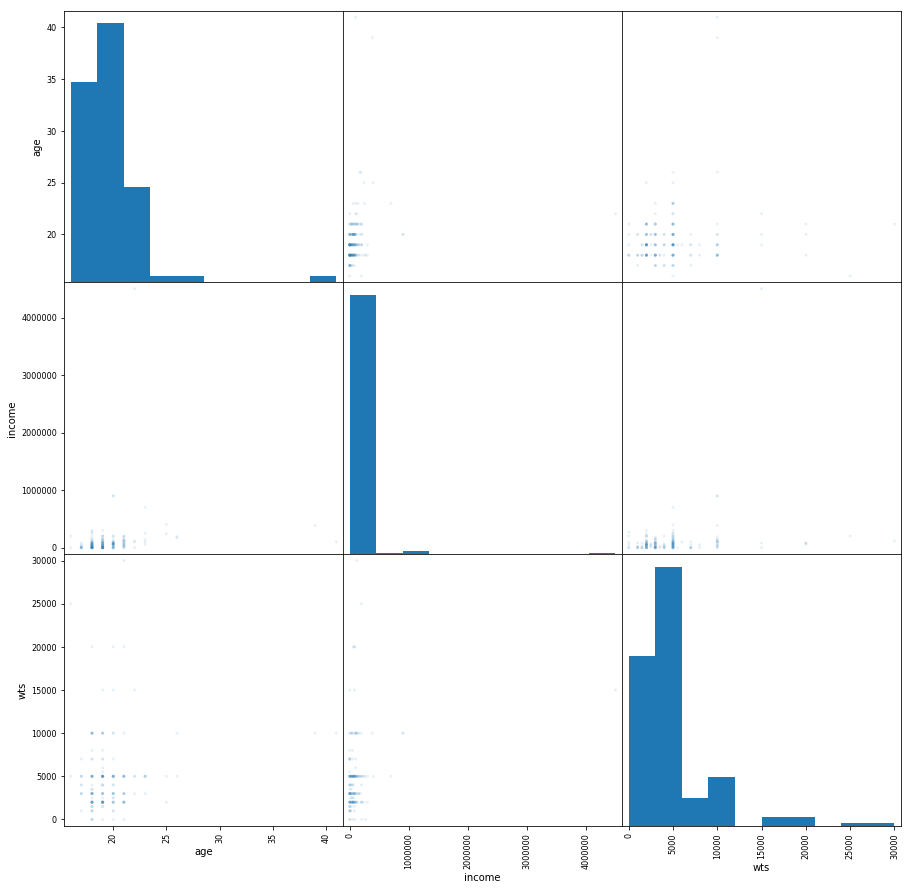

In [804]:
from pandas.plotting import scatter_matrix
scatter_matrix(raw_data, alpha=0.1, figsize=(15, 15))
pass

Корреляция между данными (числовые колонки):

In [805]:
raw_data.corr()

,age,income,wts
age,1.000000,0.163399,0.134111
income,0.163399,1.000000,0.228340
wts,0.134111,0.228340,1.000000


Из полученной корреляции: возраст, доход и готовность потратить деньги слабо связаны между собой (корреляция по модулю <= 0.25)

*Примеч.* немного странно, что нет сильной корреляции, ведь логично предположить:

- С возрастом заработок вырастает -> прямая зависимость

- Большая сумма трат в баре должна как-то коррелировать с молодостью (или же с высоким доходом) -> обратная/прямая зависимость

Посмотрим отдельно на зависимость между возрастом и доходом:

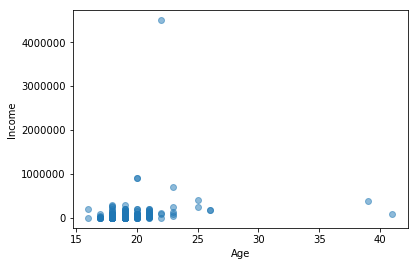

In [806]:
plt.plot(raw_data['age'], raw_data['income'], 'o', alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('Income')
pass

Смущает то, что возраст колеблется в интервале [15; 27] (с некоторыми, предположим, выбросами)

Посчитаем средние возраст и доход отдельно:

In [807]:
mean_values = {}
mean_values["age"] = raw_data['age'].mean()
mean_values["income"] = raw_data['income'].mean()
# convert income to rubles:
mean_values["income_rub"] = mean_values["income"] / 8.29
print(mean_values)

{'age': 19.548571428571428, 'income': 110197.70114942528, 'income_rub': 13292.84694202959}


Итак, средний возраст - 19,5 лет; доход - 13 тыс. руб

Похоже, что данные и правда собраны силами "университета" и, вероятно, их родственниками

> По проведенному "эксперименту" можно предположить, почему корреляция не дала каких-либо ожидаемых результатов:
> 1. Данных слишком мало
> 2. Все данные "сгруппированы" вокруг 20 лет

> \* Полагаем, что у нас "умный" аппарат корреляционного анализа, который не дает псевдо-корректных результатов при наличии различного рода ошибок, допущенных при сборе данных

Посмотрим на графики, показывающие как место жительства влияет на количество денег, которые человек готов потратить в баре, в связке с возрастом

Index(['timestamp', 'age', 'gender', 'income', 'occupation', 'fav_pub', 'wts',
       'freq', 'prim_imp', 'sec_imp', 'stratum', 'lifestyle', 'occasions'],
      dtype='object')
Stratum unique: ['Capital' 'Urban' 'Rural']


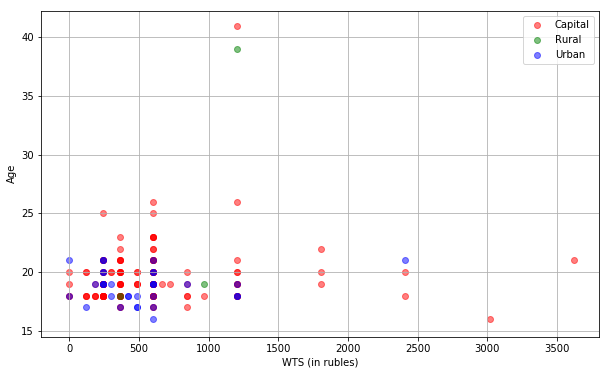

In [808]:
print(raw_data.columns)
print("Stratum unique: " + str(raw_data['stratum'].unique()))

plt.figure(figsize = (10, 6))

cap = str('Capital')
urb = str('Urban')
rur = str('Rural')

plt.scatter([val / 8.29 for val in raw_data[raw_data['stratum'] == cap]['wts']],
            raw_data[raw_data['stratum'] == cap]['age'],
            alpha = 0.5,
            label = cap,
            color = 'r')

plt.scatter([val / 8.29 for val in raw_data[raw_data['stratum'] == rur]['wts']],
            raw_data[raw_data['stratum'] == rur]['age'],
            alpha = 0.5,
            label = rur,
            color = 'g')

plt.scatter([val / 8.29 for val in raw_data[raw_data['stratum'] == urb]['wts']],
            raw_data[raw_data['stratum'] == urb]['age'],
            alpha = 0.5,
            label = urb,
            color = 'b')


plt.xlabel('WTS (in rubles)')
plt.ylabel('Age')
plt.legend()
plt.grid()

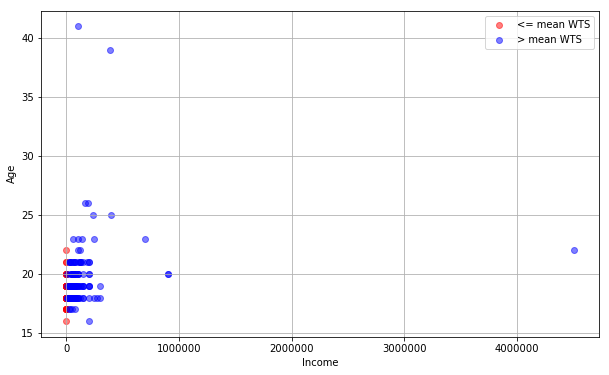

In [809]:
import copy
raw_data_cp = copy.deepcopy(raw_data)
wts_mean = np.mean(raw_data_cp['wts'])
raw_data_cp['wts'] = pd.Series(['C1' if val <= wts_mean else 'C2' for val in raw_data_cp['income']])

plt.figure(figsize = (10, 6))

plt.scatter([val for val in raw_data_cp[raw_data_cp['wts'] == "C1"]['income']],
            raw_data_cp[raw_data_cp['wts'] == "C1"]['age'],
            alpha = 0.5,
            label = "<= mean WTS",
            color = 'r')

plt.scatter([val for val in raw_data_cp[raw_data_cp['wts'] == "C2"]['income']],
            raw_data_cp[raw_data_cp['wts'] == "C2"]['age'],
            alpha = 0.5,
            label = "> mean WTS",
            color = 'b')


plt.xlabel('Income')
plt.ylabel('Age')
plt.legend()
plt.grid()

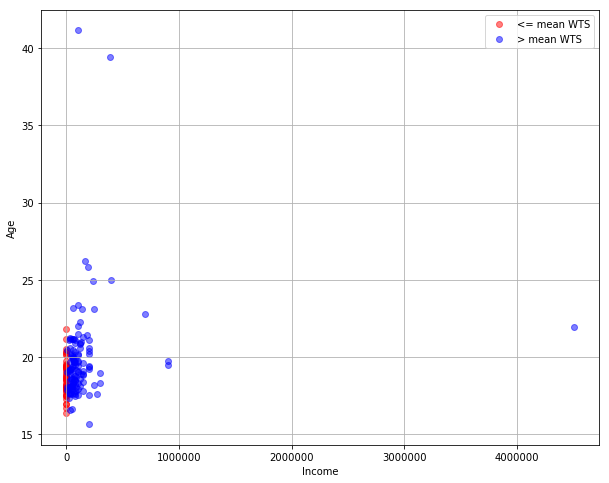

In [810]:
np.random.seed(0)
age_num_rnd = raw_data_cp['age'] + np.random.rand(raw_data_cp.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter([val for val in raw_data_cp[raw_data_cp['wts'] == "C1"]['income']],
            age_num_rnd[raw_data_cp['wts'] == "C1"],
            alpha = 0.5,
            label = "<= mean WTS",
            color = 'r')

plt.scatter([val for val in raw_data_cp[raw_data_cp['wts'] == "C2"]['income']],
            age_num_rnd[raw_data_cp['wts'] == "C2"],
            alpha = 0.5,
            label = "> mean WTS",
            color = 'b')


plt.xlabel('Income')
plt.ylabel('Age')
plt.legend()
plt.grid()

## Задача

Будем искать как зависит WTS (число денег, которые можно потратить в баре) от других факторов.

WTS - интересующий нас параметр, так как хочется понять, что именно имеет решающее значение для каждого человека при формировании 

> Для примера использования на практике: через WTS мы потенциально можем влиять на прибыль нашего бара

## Подготовка данных

Пожалуй, можно выбросить колонку timestamp за ненадобностью в нашей задаче.

Так же выбросить можно и колонку любимых баров:
- в ней приведены только названия баров, а не какие-то качественные или количественные признаки
- при дальнейшей векторизации, мы рискуем получить большое количество малозначащих признаков
- косвенно все бары характеризуются другими параметрами, которые мы оставляем (например, место жительства - место расположения бара или атмосфера бара [как пример значения из первичных/вторичных компонент])

In [811]:
data = raw_data.drop('timestamp', axis=1)
data = data.drop('fav_pub', axis=1)

In [812]:
categorical_cols = [col for col in data.columns if data[col].dtype.name == "object"]
numerical_cols = [col for col in data.columns if data[col].dtype.name != "object"]
print("Categorical: \n" + str(categorical_cols))
print("Numerical: \n" + str(numerical_cols))
print("\nSize of table: " + str(raw_data.shape))

Categorical: 
['gender', 'occupation', 'freq', 'prim_imp', 'sec_imp', 'stratum', 'lifestyle', 'occasions']
Numerical: 
['age', 'income', 'wts']

Size of table: (175, 13)


### Обработка пропусков

Для наших данных будем использовать подстановки для устранения пропусков:

- самое популярное значение - для категориальных признаков
- медиана - для количественных признаков

Делаем имеенно таким образом, так как объем исходных данных уже и без нашего вмешательства невообразимо мал.

In [813]:
print("Numerical:")
print(data[numerical_cols].count())
print("\nCategorical:")
print(data[categorical_cols].count())

# copy-pasted code for possible future reuse:
data = data.fillna(data.median(axis = 0), axis = 0)

Numerical:
age       175
income    174
wts       172
dtype: int64

Categorical:
gender        175
occupation    175
freq          175
prim_imp      175
sec_imp       175
stratum       175
lifestyle     169
occasions     173
dtype: int64


Для количественных признаков все данные заполнены, для категорийных - нет. Надо заполнить пропуски лишь для категорийных признаков.

In [814]:
for col in data[categorical_cols]:
    raw_data[col] = data[col].fillna(data[col].describe().top)
    pass
print(raw_data[categorical_cols].count())

gender        175
occupation    175
freq          175
prim_imp      175
sec_imp       175
stratum       175
lifestyle     175
occasions     175
dtype: int64


In [815]:
data.describe(include = [object])

,gender,occupation,freq,prim_imp,sec_imp,stratum,lifestyle,occasions
count,175,175,175,175,175,175,169,173
unique,2,7,3,4,4,3,10,7
top,Female,Student,rarely (once two week/or a month),Environment,Music,Capital,"Busy(student life, work)",Hang outs with friends
freq,102,122,94,122,66,139,78,138


### Векторизация категориальных признаков

Будет сделано следующее:

1. Для небинарных категориальных признаков:
    - Вместо *N* значений признака будет использоваться *N* признаков со значением 0 или 1 (в зависимости от значения исходного признака), таким образом, получив вектор сумма элементов которого всегда равна 1 (в силу того, что пропуски уже устранены)

2. Для бинарных категориальных признаков:
    - Вместо категории будем использовать число - 0 или 1 соответственно
    
Бинарные:

In [816]:
# store categorical data descriptor:
categorical_descr = data.describe(include=[object])
binary_cols = [col for col in categorical_cols if categorical_descr[col]['unique'] == 2]
print("Binary:")
print(binary_cols)
nonbinary_cols = [col for col in categorical_cols if categorical_descr[col]['unique'] > 2]
print("Non-binary:")
print(nonbinary_cols)

Binary:
['gender']
Non-binary:
['occupation', 'freq', 'prim_imp', 'sec_imp', 'stratum', 'lifestyle', 'occasions']


In [817]:
data.at[data['gender']=='Male', 'gender'] = 0
data.at[data['gender']=='Female', 'gender'] = 1
data['gender'].describe() # dtype is now int64

count     175
unique      2
top         1
freq      102
Name: gender, dtype: int64

Небинарные:

In [818]:
data_nonbinary = pd.get_dummies(data[nonbinary_cols])
print(data_nonbinary.columns)

Index(['occupation_CEO', 'occupation_Entrepreneur / Software Engineer',
       'occupation_Student', 'occupation_Student + working',
       'occupation_Working', 'occupation_Working ', 'occupation_army',
       'freq_Several times a week', 'freq_Several times in a month',
       'freq_rarely (once two week/or a month)', 'prim_imp_Environment',
       'prim_imp_Menu', 'prim_imp_Music', 'prim_imp_Pricing',
       'sec_imp_Environment', 'sec_imp_Menu', 'sec_imp_Music',
       'sec_imp_Pricing', 'stratum_Capital', 'stratum_Rural', 'stratum_Urban',
       'lifestyle_Adventure/traveling/exploring', 'lifestyle_Art',
       'lifestyle_Business, sports, dance',
       'lifestyle_Busy(student life, work)', 'lifestyle_Nightlife',
       'lifestyle_Passive ', 'lifestyle_Rock, punk', 'lifestyle_Sport',
       'lifestyle_Sport, art, traveling', 'lifestyle_Student',
       'occasions_Birthdays', 'occasions_For listening  good music ',
       'occasions_Hang outs with friends', 'occasions_Never',
    

После вызова `get_dummies` можно заметить, что некоторые колонки не совсем корректны:
- содержат пробелы, запятые и `'`
- содержат символы `(`, `)`, `/`

Попробуем с этим что-то сделать, чтобы избежать дальнейших проблем:
- заменим пробелы на `_`
- удалим все, что идет после `(`
- удалим запятые и `'`

In [819]:
# data_nonbinary.columns
data_nonbinary.columns = map(lambda col: col.split("(")[0], data_nonbinary.columns)
data_nonbinary.columns = map(lambda col: col.strip(), data_nonbinary.columns)
data_nonbinary.columns = map(lambda col: col.replace(" ", "_"), data_nonbinary.columns)
data_nonbinary.columns = map(lambda col: col.replace("'", ""), data_nonbinary.columns)
data_nonbinary.columns = map(lambda col: col.replace(",", ""), data_nonbinary.columns)
print(data_nonbinary.columns)

Index(['occupation_CEO', 'occupation_Entrepreneur_/_Software_Engineer',
       'occupation_Student', 'occupation_Student_+_working',
       'occupation_Working', 'occupation_Working', 'occupation_army',
       'freq_Several_times_a_week', 'freq_Several_times_in_a_month',
       'freq_rarely', 'prim_imp_Environment', 'prim_imp_Menu',
       'prim_imp_Music', 'prim_imp_Pricing', 'sec_imp_Environment',
       'sec_imp_Menu', 'sec_imp_Music', 'sec_imp_Pricing', 'stratum_Capital',
       'stratum_Rural', 'stratum_Urban',
       'lifestyle_Adventure/traveling/exploring', 'lifestyle_Art',
       'lifestyle_Business_sports_dance', 'lifestyle_Busy',
       'lifestyle_Nightlife', 'lifestyle_Passive', 'lifestyle_Rock_punk',
       'lifestyle_Sport', 'lifestyle_Sport_art_traveling', 'lifestyle_Student',
       'occasions_Birthdays', 'occasions_For_listening__good_music',
       'occasions_Hang_outs_with_friends', 'occasions_Never',
       'occasions_Nowere', 'occasions_Special_events/parties',
   

После всех этих операций, удалим возможные дупликаты: они могли получиться как и в ходе генерации векторов из признаков, так и после "очистки" названий

In [820]:
# verify we don't have non-unique columns:
# from collections import Counter
# non_uniques = [k for k, v in Counter(data_nonbinary.columns).items() if v > 1]

# print("Non uniques:")
# print(non_uniques)

# # check that all values are unique:
# if len(data_nonbinary.columns) == len(set(data_nonbinary.columns)):
#     print("All values left are unique")
#     pass

data_nonbinary.columns.drop_duplicates()

Index(['occupation_CEO', 'occupation_Entrepreneur_/_Software_Engineer',
       'occupation_Student', 'occupation_Student_+_working',
       'occupation_Working', 'occupation_army', 'freq_Several_times_a_week',
       'freq_Several_times_in_a_month', 'freq_rarely', 'prim_imp_Environment',
       'prim_imp_Menu', 'prim_imp_Music', 'prim_imp_Pricing',
       'sec_imp_Environment', 'sec_imp_Menu', 'sec_imp_Music',
       'sec_imp_Pricing', 'stratum_Capital', 'stratum_Rural', 'stratum_Urban',
       'lifestyle_Adventure/traveling/exploring', 'lifestyle_Art',
       'lifestyle_Business_sports_dance', 'lifestyle_Busy',
       'lifestyle_Nightlife', 'lifestyle_Passive', 'lifestyle_Rock_punk',
       'lifestyle_Sport', 'lifestyle_Sport_art_traveling', 'lifestyle_Student',
       'occasions_Birthdays', 'occasions_For_listening__good_music',
       'occasions_Hang_outs_with_friends', 'occasions_Never',
       'occasions_Nowere', 'occasions_Special_events/parties',
       'occasions_chem_aycelum']

### Нормализация количественных признаков

Многие алгоритмы машинного обучения чувствительны к масштабированию данных.
К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно _нормализовать_.
Это можно делать разными способами.
Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [821]:
data_without_y = data[['age', 'income']] # исключаем WTS так как он "Y" - не нормализуем
numerical_cols.remove('wts')
data_numerical = data_without_y[numerical_cols]
data_numerical.describe()

,age,income
count,175.000000,1.750000e+02
mean,19.548571,1.098823e+05
std,2.770262,3.565980e+05
min,16.000000,0.000000e+00
25%,18.000000,2.000000e+02
50%,19.000000,5.500000e+04
75%,20.000000,1.000000e+05
max,41.000000,4.500000e+06


In [822]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,age,income
count,1.750000e+02,1.750000e+02
mean,2.804106e-16,2.882615e-17
std,1.000000e+00,1.000000e+00
min,-1.280952e+00,-3.081405e-01
25%,-5.589982e-01,-3.075796e-01
50%,-1.980215e-01,-1.539052e-01
75%,1.629552e-01,-2.771268e-02
max,7.743466e+00,1.231111e+01


### Объединение всех признаков в одну таблицу

In [823]:
data['wts'].count()

175

In [824]:
data_concat = pd.concat((data_numerical, data_nonbinary, data[binary_cols]), axis=1)
print(data.shape)

(175, 11)


In [825]:
data_concat.describe()

,age,income,occupation_CEO,occupation_Entrepreneur_/_Software_Engineer,occupation_Student,occupation_Student_+_working,occupation_Working,occupation_Working,occupation_army,freq_Several_times_a_week,...,lifestyle_Sport,lifestyle_Sport_art_traveling,lifestyle_Student,occasions_Birthdays,occasions_For_listening__good_music,occasions_Hang_outs_with_friends,occasions_Never,occasions_Nowere,occasions_Special_events/parties,occasions_chem_aycelum
count,1.750000e+02,1.750000e+02,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,...,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,2.804106e-16,2.882615e-17,0.005714,0.005714,0.697143,0.228571,0.051429,0.005714,0.005714,0.114286,...,0.062857,0.005714,0.005714,0.080000,0.005714,0.788571,0.011429,0.005714,0.091429,0.005714
std,1.000000e+00,1.000000e+00,0.075593,0.075593,0.460812,0.421117,0.221504,0.075593,0.075593,0.319071,...,0.243402,0.075593,0.075593,0.272072,0.075593,0.409493,0.106597,0.075593,0.289045,0.075593
min,-1.280952e+00,-3.081405e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.589982e-01,-3.075796e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.980215e-01,-1.539052e-01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.629552e-01,-2.771268e-02,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,7.743466e+00,1.231111e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Формирование X и Y

Так как у нас не было классов изначально, "разобьем" наш параметр WTS на два класса:

Класс 1: WTS <= среднего значения ("мало/средне-тратящие в барах" люди)

Класс 2: WTS > среднего значения ("многотратящие в барах" люди)

In [826]:
X = data_concat
Y = None
Y_numeric = data['wts']
Y_mean = np.mean(Y_numeric)
Y = pd.Series(['C1' if val <= Y_mean else 'C2' for val in Y_numeric])
feature_names = X.columns
print(feature_names)

Index(['age', 'income', 'occupation_CEO',
       'occupation_Entrepreneur_/_Software_Engineer', 'occupation_Student',
       'occupation_Student_+_working', 'occupation_Working',
       'occupation_Working', 'occupation_army', 'freq_Several_times_a_week',
       'freq_Several_times_in_a_month', 'freq_rarely', 'prim_imp_Environment',
       'prim_imp_Menu', 'prim_imp_Music', 'prim_imp_Pricing',
       'sec_imp_Environment', 'sec_imp_Menu', 'sec_imp_Music',
       'sec_imp_Pricing', 'stratum_Capital', 'stratum_Rural', 'stratum_Urban',
       'lifestyle_Adventure/traveling/exploring', 'lifestyle_Art',
       'lifestyle_Business_sports_dance', 'lifestyle_Busy',
       'lifestyle_Nightlife', 'lifestyle_Passive', 'lifestyle_Rock_punk',
       'lifestyle_Sport', 'lifestyle_Sport_art_traveling', 'lifestyle_Student',
       'occasions_Birthdays', 'occasions_For_listening__good_music',
       'occasions_Hang_outs_with_friends', 'occasions_Never',
       'occasions_Nowere', 'occasions_Special_eve

In [827]:
print(X.shape)
print(Y.shape)

(175, 41)
(175,)


In [828]:
type(Y)

pandas.core.series.Series

#### Разбиение на обучающую и тестовую выборки

In [829]:
from sklearn.model_selection import train_test_split
# constant random_state to have repeatability
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=7)
N_train, _ = X_train.shape
N_test, _ = X_test.shape
print(N_train, N_test)

122 53


*Примеч.:* скопировано на будущее

В библиотеке scikit-learn реализована масса алгоритмов машинного обучения.

#### Некоторые алгоритмы машинного обучения, реализованные в scikit-learn:

 Метод                                     |  Класс
-------------------------------------------|--------------------------------------------         
 kNN – $k$ ближайших соседей               | `sklearn.neighbors.KNeighborsClassifier`
 LDA – линейный дискриминантный анализ     | `sklearn.discriminant_analysis.LinearDiscriminantAnalysis`
 QDA – квадратичный дискриминантный анализ | `sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis`
 Logistic – логистическая регрессия        | `sklearn.linear_model.LogisticRegression`
 SVC – машина опорных векторов             | `sklearn.svm.SVC`
 Tree – деревья решений                    | `sklearn.tree.DecisionTreeClassifier`
 RF – случайный лес                        | `sklearn.ensemble.RandomForestClassifier`
 ExtrRF – экстремально случайный лес       | ` `
 AdaBoost – алгоритм AdaBoost              | `sklearn.ensemble.AdaBoostClassifier`
 GBT – градиентный бустинг деревьев решений| `sklearn.ensemble.GradientBoostingClassifier`
 Нейронные сети                            | ` `
 



#### Основные методы классов, реализующих алгоритмы машинного обучения
Все алгоритмы выполнены в виде классов, обладающих по крайней мере следующими методами:



   Метод класса            |  Описание     
 --------------------------|-------------------------------------------------------------
  `fit(X, y)`              |  обучение (тренировка) модели на обучающей выборке `X`, `y`
  `predict(X)`             |  предсказание на данных `X`
  `set_params(**params)`   |  установка параметров алгоритма
  `get_params()`           |  чтение параметров алгоритма
 
 Заметим, что параметры алгоритмов обучения можно задавать как в конструкторе класса, так и с помощью метода `set_params(**params)`.
 
 #### Таблица наличия/отсутствия методов для основных алгоритмов машинного обучения:
 
    
   Методы класса               | kNN | LDA | QDA | Logistic | SVC | Tree | RF | AdaBoost | GBT     
 ------------------------------|-----|-----|-----|----------|-----|------|----|----------|------
  `fit(X, y)`                  |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `predict(X)`                 |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `predict_proba(X)`           |  +  |  +  |  +  |    +     |     |  +   | +  |    +     |  +
  `predict_log_proba(X)`       |     |  +  |  +  |    +     |     |  +   | +  |    +     |  +
  `score(X, y)`                |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `decision_function(X)`       |     |  +  |  +  |    +     |  +  |      |    |    +     |  +
  `transform(X)`               |     |  +  |     |    +     |     |  +   | +  |          |  +
  `staged_decision_function(X)`|     |     |     |          |     |      |    |    +     |  +    
  `staged_predict(X)`          |     |     |     |          |     |      |    |    +     |  +
  `staged_predict_proba(X)`    |     |     |     |          |     |      |    |    +     |  +
  `staged_score(X, y)`         |     |     |     |          |     |      |    |    +     |  +
  `set_params(**params)`       |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `get_params()`               |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
    

# $k$NN

In [830]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10) # run default
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [831]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [832]:
Y_train_predict = knn.predict(X_train)
Y_test_predict = knn.predict(X_test)

err_train = np.mean(Y_train != Y_train_predict)
err_test = np.mean(Y_test != Y_test_predict)

print(err_train, err_test)

err_test2 = 1 - knn.score(X_test, Y_test) # Другой способ
print(err_test2)

0.377049180328 0.566037735849
0.566037735849


###### Получилась большая ошибка:

- Плохо подобраны параметры алгоритма
- Исходная выборка очень маленькая (175 записей), в принципе не стоит ожидать, что алгоритм сможет хорошо предсказывать результат на таком ничтожно малом наборе данных, особенно если мы заходим действительно спрогнозировать какую-то величину (которая не входит в изначальную выборку и находится "далеко" за пределами наших значений)

In [833]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(Y_test, Y_test_predict))

[[18  5]
 [25  5]]


Из документации о confusion_matrix:

> Thus in binary classification, the count of true negatives is C_{0,0}, false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.

Таким образом,

$k$NN нашел:
- 9 "true negatives"
- 16 "false negatives"
- 4 "true positives"
- 6 "false positives"

Получается, что с параметрами по умолчанию, наш алгоритм чаще ошибается, чем оказывается прав

#### Подбор параметров

In [834]:
from sklearn.model_selection import GridSearchCV

n_neighbours = []
for i in range(20):
    if (i % 2 != 0):
        n_neighbours.append(i)
        pass
    pass
n_neighbours

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [835]:
knn_default = KNeighborsClassifier()
# using default cross-validation
grid = GridSearchCV(knn_default, param_grid = {'n_neighbors': n_neighbours}, cv=None)
grid.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [836]:
best_cv_err = 1 - grid.best_score_
best_n_neighbours = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbours)

0.418032786885 5


In [837]:
knn_smart = KNeighborsClassifier(n_neighbors=best_n_neighbours).fit(X_train, Y_train)

err_train_smart = np.mean(Y_train != knn_smart.predict(X_train))
err_test_smart  = np.mean(Y_test  != knn_smart.predict(X_test))

print(err_train_smart, err_test_smart)

0.245901639344 0.566037735849


# LDA & QDA: дискриминантный анализ

Dataset: [armenian pubs](https://www.kaggle.com/erikhambardzumyan/pubs)

Подробнее о данных можно узнать в [предыдущей работе](https://github.com/andrgolubev/python-sandbox/blob/master/data_analysis_1.ipynb)


## Плюсы и минусы методов LDA и QDA

**Плюсы**

* Простые методы
* Показывают хорошие результаты, когда данные имеют нормальное распределение или близки к нему
* Достаточно устойчивы к выбросам 
* Можно использовать для понижения размерности

**Минусы**

* Показывают плохие результаты, когда разделяющие поверхности слишком сложные
* Работают только с числовыми признаками
* Нет естественного способа обработки пропущенных значений
* Чувствительны к масштабированию

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Предобработка данных (подробнее процесс описан в работе №1)

Используем собственную функцию для получения и обработки данных - все до момента разделения на X и Y

In [2]:
import data_retrieve as dr

In [3]:
X, data = dr.parse_and_prepare("armenian_pubs.csv", sep=",", engine="python")

#### Формируем X и Y

Для простоты дальнейшего использования в визуализации добавим Y, где классы представляются целочисленными значениями:
- 'C1' <=> 0
- 'C2' <=> 1

In [4]:
Y = None
Y_numeric = data['wts']
Y_mean = np.mean(Y_numeric)
Y = pd.Series(['C1' if val <= Y_mean else 'C2' for val in Y_numeric])
intY = pd.Series([0 if val is 'C1' else 1 for val in Y])
feature_names = X.columns
print(feature_names)
# print("Y:\n", Y[:5])
# print("Y в виде целочисленных значений:\n", intY[:5])

Index(['age', 'income', 'occupation_CEO',
       'occupation_Entrepreneur_/_Software_Engineer', 'occupation_Student',
       'occupation_Student_+_working', 'occupation_Working',
       'occupation_Working', 'occupation_army', 'freq_Several_times_a_week',
       'freq_Several_times_in_a_month', 'freq_rarely', 'prim_imp_Environment',
       'prim_imp_Menu', 'prim_imp_Music', 'prim_imp_Pricing',
       'sec_imp_Environment', 'sec_imp_Menu', 'sec_imp_Music',
       'sec_imp_Pricing', 'stratum_Capital', 'stratum_Rural', 'stratum_Urban',
       'lifestyle_Adventure/traveling/exploring', 'lifestyle_Art',
       'lifestyle_Business_sports_dance', 'lifestyle_Busy',
       'lifestyle_Nightlife', 'lifestyle_Passive', 'lifestyle_Rock_punk',
       'lifestyle_Sport', 'lifestyle_Sport_art_traveling', 'lifestyle_Student',
       'occasions_Birthdays', 'occasions_For_listening__good_music',
       'occasions_Hang_outs_with_friends', 'occasions_Never',
       'occasions_Nowere', 'occasions_Special_eve

In [5]:
print(X.shape)
print(Y.shape)

(175, 41)
(175,)


#### Разбиение на обучающую и тестовую выборки

In [6]:
from sklearn.model_selection import train_test_split
# constant random_state to have repeatability
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=7)
N_train, _ = X_train.shape
N_test, _ = X_test.shape
intY = pd.Series([0 if val is 'C1' else 1 for val in Y_train])
print(N_train, N_test)

122 53


## Линейный дискриминантный анализ

_Априорная вероятность_:

$$
{\rm Pr\,} y
$$

_Апостериорная вероятность_:

$$
{\rm Pr\,}(y \mid x) = \frac{p(x\mid y)\, {\rm Pr\,} y}{p(x)}\ 
$$

Линейный дискриминантный анализ (LDA) делает два предположения:

 - объекты каждого класса распределены по нормальному закону:

$$
p(x\mid y) = \frac{1}{\sqrt{(2\pi)^d\det\Sigma_y}}e^{-\frac{1}{2}(x-\mu_y)^{\top}\Sigma_y^{-1}(x-\mu_y)}
$$

 - матрицы ковариации $\Sigma = \Sigma_y$ одинаковы для всех классов
 
 
Нам нужно сравнить две апостериорные вероятности:

$$
{\rm Pr\,}(y \mid x) > {\rm Pr\,}(y' \mid x)
$$

Подставляя выражения для $p(x\mid y)$ и $p(x\mid y')$ и логарифмируя, приходим к неравенству:

$$
{-\frac{1}{2}(x-\mu_y)^{\top}\Sigma^{-1}(x-\mu_y)} + \ln {\rm Pr\,} y
>
{-\frac{1}{2}(x-\mu_{y'})^{\top}\Sigma^{-1}(x-\mu_{y'})} + \ln {\rm Pr\,} y'
$$

Откуда

$$
(\mu_y - \mu_{y'})^{\top} \Sigma^{-1} x >
\frac{1}{2}\mu_{y}^{\top}\Sigma^{-1}\mu_{y} - \frac{1}{2}\mu_{y'}^{\top}\Sigma^{-1}\mu_{y'}
- \ln {\rm Pr\,} y+ \ln {\rm Pr\,} y'
$$
т. е.
$$
w^{\top} x > c,
$$
где $w = (\mu_y - \mu_{y'})^{\top} \Sigma^{-1}$, а $c$ – некоторая константа.

Таким образом, 

* уравнение $w^{\top} x = c$ задает разделяющую гиперплоскость между классами $y$ и $y'$
* важна линейная комбинация признаков $x$ с коэффициентами $w$

Введем _линейную дискриминантную функцию_:
$$
\delta_y(x) = 
- \frac{1}{2}(x-\mu_y)^{\top}\Sigma^{-1}(x-\mu_y) + \frac{1}{2}x^{\top}\Sigma^{-1}x + \ln {\rm Pr}\,y
= \mu_y^{\top} \Sigma^{-1} x  - \frac{1}{2}\mu_y^{\top}\Sigma^{-1}\mu_y + \ln {\rm Pr}\,y
$$

Классификатор: объект $x$ относим к тому классу $y$, для которого $\delta_y(x)$ максимальна.

Здесь 
$$
\rho(x,x') = \sqrt{(x-x')^{\top}\Sigma^{-1}(x-x')}
$$
– это _расстояние Махаланобиса_.


### Пример данных и LDA

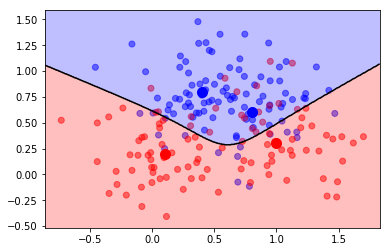

In [7]:
import mysk
Z, r = mysk.generate_points(seed = 5)
mysk.draw_points(Z, r)
mysk.draw_centers()
mysk.draw_bayes_sep_curve()

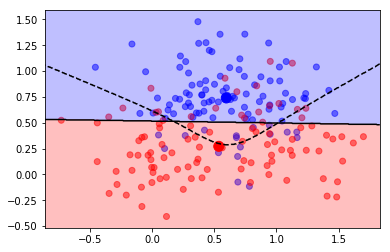

In [8]:
from sklearn import discriminant_analysis
lda_model_ex = discriminant_analysis.LinearDiscriminantAnalysis()
lda_model_ex.fit(Z, r)

mysk.draw_points(Z, r)
mysk.draw_sep_curve(lda_model_ex)
mysk.draw_bayes()
plt.scatter(lda_model_ex.means_[:, 0], lda_model_ex.means_[:, 1], color = ['b', 'r'], s = 100)

### LDA: наши данные

In [9]:
from sklearn import discriminant_analysis
lda_model = discriminant_analysis.LinearDiscriminantAnalysis()
lda_model.fit(X_train, Y_train)

/home/abay/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

#### Важно

Для наших данных LDA выдает следующее предупреждение: "Variables are collinear"

Что это означает?
Между данными векорами признаков есть корреляция:

 - LDA вычисляет обратную матрицу в ходе регрессионного анализа. В случае, если несколько признаков образуют линейную комбинацию (или почти образуют), определитель матрицы будет принимать значения близкие к 0 или 0, что означает, что нельзя посчитать обратную матрицу
 
 - Более того, тяжелее становится проинтерпретировать полученные коэффициенты. Например: если увеличение X1 влечет за собой снижение X2, но при этом X1 & X2 увеличивают выходное значение Y: каждое изменение в X1 будет "сглаживаться" изменением X2 и эффект влияния X1 на Y будет неявно уменьшен

(0.0, 1.0)

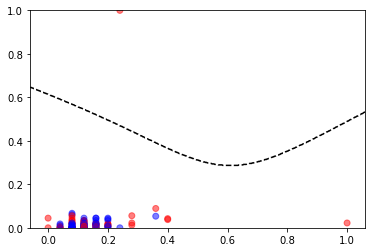

In [10]:
from numpy import array
from matplotlib.pyplot import scatter
xx0_min, xx0_max = plt.xlim()
xx1_min, xx1_max = plt.ylim()
vX = X_train.values # taking raw values from DataFrame for visualization
mysk.draw_points(vX, intY)
mysk.draw_bayes()
# plt.xlim((xx0_min, xx0_max))
plt.ylim((xx1_min, xx1_max))

#### Замечание

Так как размерность наших признаков - 41 (число столбцов), невозможно построить график в 41-мерном пространстве

На графике видно, что классы тесно пересекаются:

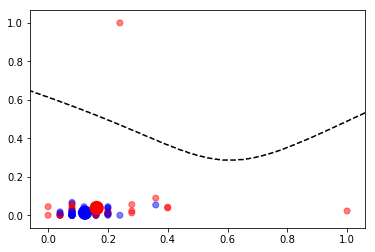

In [11]:
vX = X_train.values # taking raw values from DataFrame for visualization
mysk.draw_points(vX, intY)
mysk.draw_bayes()
plt.scatter(lda_model.means_[:, 0], lda_model.means_[:, 1], color = ['b', 'r'], s = Y.shape)
# _, features_number = X.shape
# dr.draw_sep_curve_and_reshape(model=lda_model, n_dims=features_number)

#### Средние значения признаков в получившейся модели для заданных классов

In [12]:
lda_model.means_

array([[ 0.12333333,  0.01308642,  0.        ,  0.        ,  0.77777778,
         0.19444444,  0.01388889,  0.        ,  0.01388889,  0.09722222,
         0.48611111,  0.41666667,  0.69444444,  0.04166667,  0.20833333,
         0.05555556,  0.16666667,  0.19444444,  0.38888889,  0.25      ,
         0.81944444,  0.        ,  0.18055556,  0.20833333,  0.18055556,
         0.        ,  0.41666667,  0.04166667,  0.01388889,  0.02777778,
         0.05555556,  0.        ,  0.        ,  0.04166667,  0.01388889,
         0.77777778,  0.01388889,  0.01388889,  0.09722222,  0.01388889,
         0.65277778],
       [ 0.1624    ,  0.03806844,  0.02      ,  0.02      ,  0.56      ,
         0.3       ,  0.08      ,  0.02      ,  0.        ,  0.06      ,
         0.32      ,  0.62      ,  0.76      ,  0.        ,  0.2       ,
         0.04      ,  0.14      ,  0.3       ,  0.36      ,  0.2       ,
         0.82      ,  0.        ,  0.18      ,  0.2       ,  0.08      ,
         0.02      ,  0.5    

#### Подсчет ошибок

In [13]:
err_train = np.mean(Y_train != lda_model.predict(X_train))
err_test = np.mean(Y_test != lda_model.predict(X_test))
print(err_train, err_test)

0.245901639344 0.547169811321


#### Априорные вероятности

Так как Y - бинарный: "C1" или "C2", то вероятностей 2:

${\rm Pr\,}(y="C1")$ и ${\rm Pr\,}(y="C2")$


In [14]:
print(lda_model.priors_)

[ 0.59016393  0.40983607]


#### Коэффициенты

Получившиеся коэффициенты: $w^{\top}$

Например, из уравнения: $w^{\top} x = c$

Их количество должно быть равно количеству признаков

In [15]:
print(lda_model.coef_)
_, features_number = X.shape
print("LDA coeffs. size: ", len(lda_model.coef_[0]))
print("Features size: ", features_number)

[[  2.37075776e+00  -4.58128645e+00   2.10767816e+00   5.17232886e+00
   -7.41749883e-01   1.99646192e-01   1.21301496e+00   3.04227860e+00
   -1.77944363e+00  -3.31664977e-01  -6.57247031e-01   7.51482222e-01
    1.05001210e-01  -5.40917019e-01  -2.21385970e-01   5.95563132e-01
   -3.79666938e-01   9.13463047e-01  -2.73701594e-01  -2.77886053e-01
   -2.10969343e-01  -1.86863504e-16   2.10969343e-01   1.23220214e+00
    8.90492983e-01   2.10767816e+00   1.62332323e+00   2.63104288e-01
   -4.99555485e-01   2.67989597e+00   1.20127762e+00   6.66996963e-17
    4.41092418e+00   4.92057144e+00   2.03745760e+00   3.56888495e+00
   -1.19991176e+00   1.15680894e+00   3.23290407e+00  -5.62234062e-01
   -1.05538478e+00]]
LDA coeffs. size:  41
Features size:  41


## Квадратичный дискриминантный анализ

### Пример данных и QDA

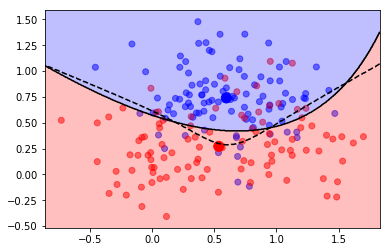

In [16]:
qda_model_ex = discriminant_analysis.QuadraticDiscriminantAnalysis()
qda_model_ex.fit(Z, r)

mysk.draw_points(Z, r)
mysk.draw_sep_curve(qda_model_ex)
mysk.draw_bayes()
plt.scatter(qda_model_ex.means_[:, 0], qda_model_ex.means_[:, 1], color = ['b', 'r'], s = 100)

### QDA: наши данные

In [17]:
qda_model = discriminant_analysis.QuadraticDiscriminantAnalysis()
qda_model.fit(X, Y)

/home/abay/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)

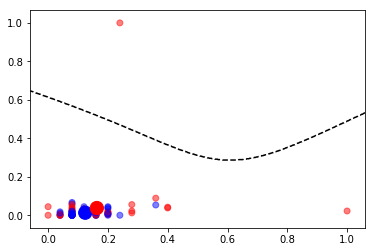

In [18]:
mysk.draw_points(vX, intY)
mysk.draw_bayes()
plt.scatter(qda_model.means_[:, 0], qda_model.means_[:, 1], color = ['b', 'r'], s = Y.shape)

#### Ошибки

In [19]:
err_train = np.mean(Y != lda_model.predict(X))
err_test = np.mean(Y_test != lda_model.predict(X_test))
print(err_train, err_test)

0.337142857143 0.547169811321


## LDA для понижения размерности

### Пример данных

In [20]:
from sklearn import datasets
iris = datasets.load_iris()

X_iris = iris.data
y_iris = iris.target
names = iris.target_names

lda_model = discriminant_analysis.LinearDiscriminantAnalysis(n_components = 2)
lda_model.fit(X_iris, y_iris)
X_iris_lda = lda_model.transform(X_iris) # projected data

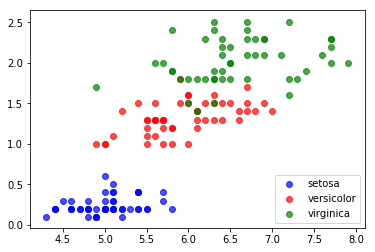

In [21]:
plt.scatter(X_iris[y_iris == 0, 0], X_iris[y_iris == 0, 3], color = 'b', label = names[0], alpha = 0.7)
plt.scatter(X_iris[y_iris == 1, 0], X_iris[y_iris == 1, 3], color = 'r', label = names[1], alpha = 0.7)
plt.scatter(X_iris[y_iris == 2, 0], X_iris[y_iris == 2, 3], color = 'g', label = names[2], alpha = 0.7)

plt.legend(loc = 4)
pass

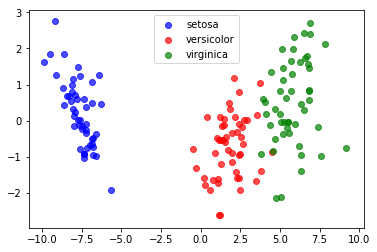

In [22]:
plt.scatter(X_iris_lda[y_iris == 0, 0], X_iris_lda[y_iris == 0, 1], color = 'b', label = names[0], alpha = 0.7)
plt.scatter(X_iris_lda[y_iris == 1, 0], X_iris_lda[y_iris == 1, 1], color = 'r', label = names[1], alpha = 0.7)
plt.scatter(X_iris_lda[y_iris == 2, 0], X_iris_lda[y_iris == 2, 1], color = 'g', label = names[2], alpha = 0.7)

plt.legend(loc = 9)
pass

### Наши данные

In [23]:
data_names = ["C1", "C2"]

lda_model2 = discriminant_analysis.LinearDiscriminantAnalysis(n_components = 2)
lda_model2.fit(X, Y)
X_projected = lda_model2.transform(X)

/home/abay/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [24]:
print("X.shape: ", X.shape)
print("X_projected.shape: ", X_projected.shape)
print("Y.shape: ", Y.shape)

X.shape:  (175, 41)
X_projected.shape:  (175, 1)
Y.shape:  (175,)


На графике ниже видно, что данные не отличимы

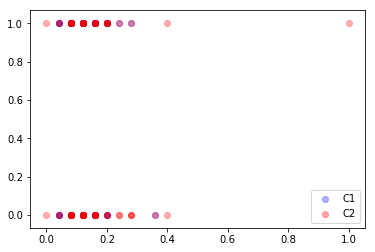

In [25]:
X_arr = X.values
plt.scatter(X_arr[Y == 'C1', 0], X_arr[Y == 'C1', 40], color = 'b', label = data_names[0], alpha = 0.3)
plt.scatter(X_arr[Y == 'C2', 0], X_arr[Y == 'C2', 40], color = 'r', label = data_names[1], alpha = 0.3)

plt.legend(loc = 4)
pass

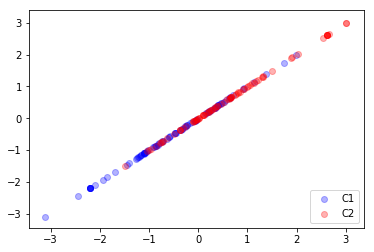

In [26]:
plt.scatter(X_projected[Y == 'C1', 0], X_projected[Y == 'C1', 0], color = 'b', label = data_names[0], alpha = 0.3)
plt.scatter(X_projected[Y == 'C2', 0], X_projected[Y == 'C2', 0], color = 'r', label = data_names[1], alpha = 0.3)

plt.legend(loc = 4)
pass

После применения проекции (LDA.transform(...)) стало возможным различить (хотя бы как-то) множество признаков:
- Y = 'C1': стремится к нижнему левому углу 
- Y = 'C2': стремится к верхнему правому углу

## Логистическая регрессия

Dataset: [armenian pubs](https://www.kaggle.com/erikhambardzumyan/pubs)

Подробнее о данных можно узнать в [первой работе](https://github.com/andrgolubev/python-sandbox/blob/master/data_analysis_1.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Плюсы и минусы метода логистической регрессии

**Плюсы**

* Простой метод
* Показывают хорошие результаты, когда данные линейно разделимы
* Более устойчивый к выбросам, чем LDA

**Минусы**

* Показывают плохие результаты, когда разделяющие поверхности слишком сложные (но можно попытаться расширить пространство признаков)
* Работают только с числовыми признаками
* Не работают напрямую с пропущенными значениями

## Логистическая регрессия для $K$ классов


Пусть

$$
{\rm Pr}(Y=k \mid X=x) = \frac{e^{\beta_{k0} + \beta_{k1} x_1 + \dots + \beta_{kd} x_d}}{\sum_{\ell=1}^K e^{\beta_{\ell 0} + \beta_{\ell 1} x_1 + \dots + \beta_{\ell d} x_d}} 
=
\frac{e^{\beta_{k0} + \beta_k^{\rm T} x}}{\sum_{\ell=1}^K e^{\beta_{\ell 0} + \beta_{\ell}^{\rm T} x}}
\qquad
(k = 1,2,\dots,K)
$$

Преобразуем и переобозначим:

$$
{\rm Pr}(Y=k \mid X=x) = 
\frac{e^{\beta_{k0} + \beta_k^{\rm T} x}}{1 + \sum_{\ell=1}^{K-1} e^{\beta_{\ell 0} + \beta_{\ell}^{\rm T} x}}
\qquad
(k = 1,2,\dots,K-1),
\qquad
{\rm Pr}(Y=K \mid X=x) = 
\frac{1}{1 + \sum_{\ell=1}^{K-1} e^{\beta_{\ell 0} + \beta_{\ell}^{\rm T} x}}
$$

Разделяющие поверхности линейные:

$$
{\rm Pr}(Y=k \mid X=x) = {\rm Pr}(Y=K \mid X=x) 
\quad\Leftrightarrow\quad 
e^{\beta_{k0} + \beta_k^{\rm T} x} = 1
\quad\Leftrightarrow\quad 
\beta_{k0} + \beta_k^{\rm T} x = 0
$$

$$
{\rm Pr}(Y=k \mid X=x) = {\rm Pr}(Y=k' \mid X=x)
\quad\Leftrightarrow\quad 
e^{\beta_{k0} + \beta_k^{\rm T} x} = e^{\beta_{k'0} + \beta_{k'}^{\rm T} x}
\quad\Leftrightarrow\quad 
\beta_{k0} + \beta_k^{\rm T} x = \beta_{k'0} + \beta_{k'}^{\rm T} x
$$


В логистической регрессии параметры обычно подбираются с помощью метода максимального правдоподобия. 

_Логарифмическая функция правдоподобия_
$$
\ell(\beta) = \sum_{i=1}^N \ln {\rm Pr}\{Y = y^{(i)} \mid X = x^{(i)}, \beta\} \to \max,
$$
где
$$
\beta = (\beta_{10},\beta_1,\beta_{20},\beta_2,\dots,\beta_{K-1,0},\beta_{K-1}),
\quad
\Pr(Y = k\mid X = x, \beta) = \Pr(Y=k\mid X=x).
$$


Подробно рассмотрим случай $K=2$: ${\cal Y} =\{0,1\}$.


$$
g(x,\beta) = \Pr\{Y = 1\mid X = x, \beta\} = \frac{1}{1+e^{-\beta_0 - \beta^{\rm T} x}}.
$$

Требуется максимизировать логарифмическую функцию правдоподобия 
$$
\ell(\beta) = \sum_{i=1}^N \Bigl( y^{(i)} \ln g(x^{(i)},\beta) + (1-y^{(i)})\ln\bigl(1-g(x^{(i)},\beta)\bigr)\Bigr).
$$

Легко доказать, что
$$
\frac{\partial\ell(\beta)}{\partial\beta_0} = \sum_{i=1}^N \left(y^{(i)} - f(x^{(i)},\beta)\right),
\qquad
\frac{\partial\ell(\beta)}{\partial\beta_j} = \sum_{i=1}^N \left(y^{(i)} - f(x^{(i)},\beta)\right) x_j^{(i)}.
$$

Теперь можем воспользоваться методом градиентного спуска или более продвинутыми методами оптимизации (сопряженных градиентов, BFGS, L-BFGS и др.).

### Логистическая регрессия: пример данных

Пусть
$$
{\rm Pr}(Y=1 \mid X=x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \dots + \beta_d x_d)}} 
                = \sigma(\beta_0 + \beta_1 x_1 + \dots + \beta_d x_d)
$$

Элементарная логистическая функция (элементарный сигмоид):
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

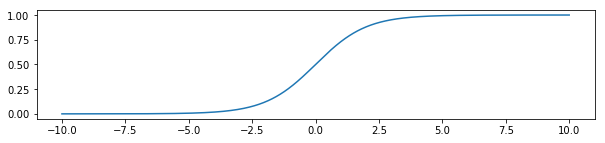

In [2]:
plt.figure(figsize = (10, 2))
z = np.linspace(-10, 10, 1000)
sigma = 1/(1 + np.exp(-z))
plt.plot(z, sigma)

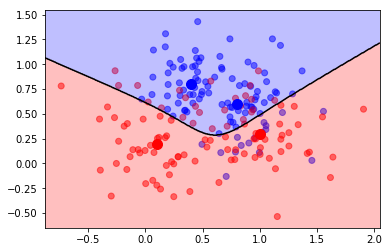

In [3]:
import mysk

X, y = mysk.generate_points(seed = 1)
mysk.draw_points(X, y)
mysk.draw_centers()
mysk.draw_bayes_sep_curve()

Тестовая выборка:

In [4]:
X_test, y_test = mysk.generate_points(seed = 5)

Логистическая регрессия из scikit learn:

In [5]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

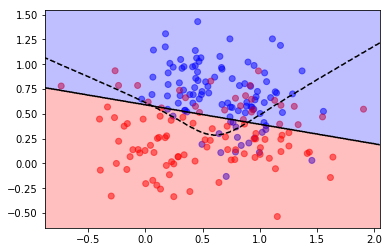

In [6]:
mysk.draw_points(X, y)
mysk.draw_sep_curve(logistic_model)
mysk.draw_bayes()

In [7]:
err_train = np.mean(y != logistic_model.predict(X))
err_test = np.mean(y_test != logistic_model.predict(X_test))
print(err_train, err_test)

0.235 0.215


In [8]:
print(logistic_model.coef_) # Коэффициенты разделяющей гиперплоскости
print(logistic_model.intercept_)

[[-0.6296239 -3.2109123]]
[ 1.89895964]


### Логистическая регрессия: наши данные

In [9]:
import data_retrieve as dr
X, data = dr.parse_and_prepare("armenian_pubs.csv", sep=",", engine="python")
Y = None
Y_numeric = data['wts']
Y_mean = np.mean(Y_numeric)
Y = pd.Series(['C1' if val <= Y_mean else 'C2' for val in Y_numeric])
intY = pd.Series([0 if val is 'C1' else 1 for val in Y])
feature_names = X.columns
print(feature_names)

Index(['age', 'income', 'occupation_CEO',
       'occupation_Entrepreneur_/_Software_Engineer', 'occupation_Student',
       'occupation_Student_+_working', 'occupation_Working',
       'occupation_Working', 'occupation_army', 'freq_Several_times_a_week',
       'freq_Several_times_in_a_month', 'freq_rarely', 'prim_imp_Environment',
       'prim_imp_Menu', 'prim_imp_Music', 'prim_imp_Pricing',
       'sec_imp_Environment', 'sec_imp_Menu', 'sec_imp_Music',
       'sec_imp_Pricing', 'stratum_Capital', 'stratum_Rural', 'stratum_Urban',
       'lifestyle_Adventure/traveling/exploring', 'lifestyle_Art',
       'lifestyle_Business_sports_dance', 'lifestyle_Busy',
       'lifestyle_Nightlife', 'lifestyle_Passive', 'lifestyle_Rock_punk',
       'lifestyle_Sport', 'lifestyle_Sport_art_traveling', 'lifestyle_Student',
       'occasions_Birthdays', 'occasions_For_listening__good_music',
       'occasions_Hang_outs_with_friends', 'occasions_Never',
       'occasions_Nowere', 'occasions_Special_eve

#### Разбиение на обучающую и тестовую выборки

In [10]:
from sklearn.model_selection import train_test_split
# constant random_state to have repeatability
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=7)
N_train, _ = X_train.shape
N_test, _ = X_test.shape
intY = pd.Series([0 if val is 'C1' else 1 for val in Y_train])
print(N_train, N_test)

122 53


In [11]:
logreg_model = LogisticRegression(C=0.1)
logreg_model.fit(X_train, Y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

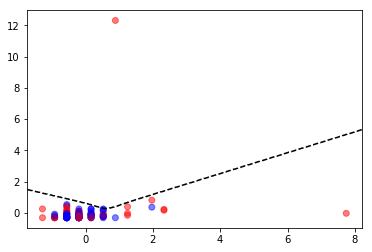

In [12]:
vX = X_train.values # taking raw values from DataFrame for visualization
mysk.draw_points(vX, intY)
mysk.draw_bayes()
# _, features_number = X.shape
# dr.draw_sep_curve_and_reshape(model=lda_model, n_dims=features_number)

#### Коэффициенты перед X в decision function

In [13]:
print(logreg_model.coef_)
_, features_number = X.shape
print("Logistic Regression coeffs. size: ", len(logreg_model.coef_[0]))
print("Features size: ", features_number)

[[  2.54008969e-01   1.58958291e-01   5.09239388e-02   6.89558817e-03
   -2.63632721e-01   8.40249901e-02   7.88787165e-02   4.09895246e-02
   -5.61658744e-02  -6.55752427e-02  -2.46038965e-01   2.53528370e-01
    4.22351318e-02  -7.49410529e-02   1.29202006e-04  -2.55091184e-02
   -8.01675847e-02   1.72790955e-01  -6.58613004e-02  -8.48479073e-02
   -5.61959343e-02   0.00000000e+00  -1.88990314e-03  -2.74389758e-02
   -1.50854311e-01   5.09239388e-02   4.92445238e-02  -5.57883026e-02
   -3.63126009e-02   9.37184846e-02   5.38418788e-02   0.00000000e+00
    5.73623871e-02   1.64225769e-01  -3.58882151e-02   8.71110309e-02
   -6.02542491e-02  -3.76661306e-02  -3.77662441e-02  -4.11295720e-02
   -3.32041241e-01]]
Logistic Regression coeffs. size:  41
Features size:  41


#### Ошибки

In [14]:
err_train = np.mean(Y_train != logreg_model.predict(X_train))
err_test = np.mean(Y_test != logreg_model.predict(X_test))
print(err_train, err_test)

0.33606557377 0.509433962264


#### Bias значение ($\beta_0$ из уравнения сигмоиды):

In [15]:
logreg_model.intercept_

array([-0.05808584])

# Машина опорных векторов

Dataset: [armenian pubs](https://www.kaggle.com/erikhambardzumyan/pubs)

Подробнее о данных можно узнать в [первой работе](https://github.com/andrgolubev/python-sandbox/blob/master/data_analysis_1.ipynb)

## Плюсы и минусы машины опорных векторов

**Плюсы**

* Эффективны в многомерных пространствах
* Все еще эффективны, если N в N-мерном пространстве больше, чем количество примеров выборки
* Можно использовать различные ядра (kernels) для улучшения результата (в том числе, свои собственные)

**Минусы**

* Если количество признаков много больше, чем количество примеров, можно ожидать переобучения (overfitting) при выборе ядер. Становится очень важна регуляризация
* Сама машина опорных векторов не предоставляет вероятностных оценок

#### Перекрывающиеся классы

Математическая постановка задачи:
$$ 
\beta, \beta_0, \xi = \mathop{\rm argmin}_{\beta, \beta_0, \xi} \frac{1}{2} \|\beta\|^2 
+ C \sum_{i=1}^N \xi_i
$$
при ограничениях
$$
y^{(i)} (\beta^{\top}x^{(i)} + \beta_0) \ge 1 - \xi_i,
\qquad
\xi_i \ge 0
\qquad
(i = 1,2,\dots, N)
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Наши данные

In [2]:
import data_retrieve as dr
X, data = dr.parse_and_prepare("armenian_pubs.csv", sep=",", engine="python")
Y = None
Y_numeric = data['wts']
Y_mean = np.mean(Y_numeric)
Y = pd.Series(['C1' if val <= Y_mean else 'C2' for val in Y_numeric])
intY = pd.Series([0 if val is 'C1' else 1 for val in Y])
feature_names = X.columns
print(feature_names)

Index(['age', 'income', 'occupation_CEO',
       'occupation_Entrepreneur_/_Software_Engineer', 'occupation_Student',
       'occupation_Student_+_working', 'occupation_Working',
       'occupation_Working', 'occupation_army', 'freq_Several_times_a_week',
       'freq_Several_times_in_a_month', 'freq_rarely', 'prim_imp_Environment',
       'prim_imp_Menu', 'prim_imp_Music', 'prim_imp_Pricing',
       'sec_imp_Environment', 'sec_imp_Menu', 'sec_imp_Music',
       'sec_imp_Pricing', 'stratum_Capital', 'stratum_Rural', 'stratum_Urban',
       'lifestyle_Adventure/traveling/exploring', 'lifestyle_Art',
       'lifestyle_Business_sports_dance', 'lifestyle_Busy',
       'lifestyle_Nightlife', 'lifestyle_Passive', 'lifestyle_Rock_punk',
       'lifestyle_Sport', 'lifestyle_Sport_art_traveling', 'lifestyle_Student',
       'occasions_Birthdays', 'occasions_For_listening__good_music',
       'occasions_Hang_outs_with_friends', 'occasions_Never',
       'occasions_Nowere', 'occasions_Special_eve

#### Разбиение на обучающую и тестовую выборки

In [4]:
from sklearn.model_selection import train_test_split
# constant random_state to have repeatability
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=7)
N_train, _ = X_train.shape
N_test, _ = X_test.shape
intY = pd.Series([0 if val is 'C1' else 1 for val in Y_train])
print(N_train, N_test)

122 53


#### Инициализация

In [69]:
from sklearn.svm import SVC # "Support Vector Classifier"
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

(0.0, 1.0)

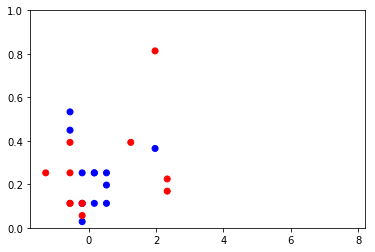

In [72]:
x0_min, x0_max = plt.xlim()
x1_min, x1_max = plt.ylim()
vX = X_train.values
colors = np.array(['b', 'r'])[intY]
plt.scatter(vX[:, 0], vX[:, 1], color = colors)
plt.ylim((x1_min, x1_max))
# draw_sep_curve(svc_model)

#### Опорные векторы

In [105]:
print("X.shape: ", X.shape)
print("len(support_vectors_[i]): ", len(svc_model.support_vectors_[0]))
print("Number of support vectors for each class: ", svc_model.n_support_)
print("Support vectors:\n", svc_model.support_vectors_)

X.shape:  (175, 41)
len(support_vectors_[i]):  41
Number of support vectors for each class:  [50 45]
Support vectors:
 [[-0.55899819 -0.13988381  0.         ...,  0.          0.          0.        ]
 [-0.91997488 -0.3081405   0.         ...,  0.          0.          0.        ]
 [-0.55899819  0.53314297  0.         ...,  0.          0.          1.        ]
 ..., 
 [ 1.24588526  0.39292906  0.         ...,  0.          0.          0.        ]
 [-0.1980215  -0.22401216  0.         ...,  1.          0.          1.        ]
 [-0.1980215  -0.3081405   0.         ...,  0.          0.          1.        ]]


### Ядро

Ядро задает скалярное произведение в спрямленном пространстве.

___Линейное ядро___ – это обычное скалярное произведение: $k(x, x') = x^{\top} x'$ – спрямленное пространство совпадает с исходным.

___Радиальное ядро___: $k(x, x') = e^{-\gamma \|x-x'\|^2}$ задается _радиальной функцией_ (Radial Basis Function): $r = e^{-\gamma(x_1^2 + x_2^2 + \dots + x_d^2)}$

___Полиномиальное ядро___: $k(x, x') = (\gamma\, x^{\top} x' + c_0)^{\delta}$

___Сигмоидальное ядро___: $k(x, x') = \mathop{\rm th}(\gamma x^{\top} x' + c_0),
\qquad \mathop{\rm th} x = \frac{e^x- e^{-x}}{e^x + e^{-x}}$, где
_гиперболический тангенс_ $\mathop{\rm th} x$ – это тот же элементарный сигмоид, только сдвинутый и растянутый по вертикальной оси.

#### Ошибки для разных ядер при разной регуляризации

In [162]:
from ipywidgets import interact

_, n_features = X.shape
def print_svc_data(kernel='linear', C=1.0):
    svc_model_modified = SVC(kernel=kernel, C=C, probability=True)
    svc_model_modified.fit(X_train, Y_train)
    print("Number of support vectors for each class: ", svc_model_modified.n_support_)
    err_train = np.mean(Y_train != svc_model_modified.predict(X_train))
    err_test = np.mean(Y_test != svc_model_modified.predict(X_test))
    print(f"Errors: train - {err_train} | test - {err_test}")
    print("Constants in decision function: ", svc_model_modified.intercept_)
    pass

interact(print_svc_data, kernel=['linear', 'poly', 'rbf', 'sigmoid'], C=(0.01, 20.01, 0.1))
pass

#### Для большей наглядности рассмотрим пример со сгенерированными данными

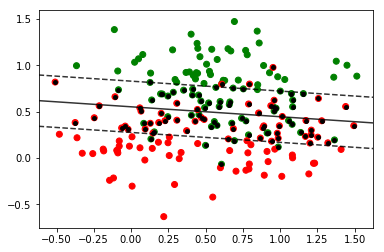

In [161]:
import mysk
from IPython import display

X, y = mysk.generate_points(seed = 0)
X_tst, y_tst = mysk.generate_points(seed = 7)
def print_svc_gen(kernel='linear', C=1.0):
    svc_model_gen = SVC(kernel=kernel, C=C, probability=True)
    svc_model_gen.fit(X, y)
    print("Number of support vectors for each class: ", svc_model_gen.n_support_)
    err_train = np.mean(y != svc_model_gen.predict(X))
    err_test = np.mean(y_tst != svc_model_gen.predict(X_tst))
    print(f"Errors: train - {err_train} | test - {err_test}")
    print("Constants in decision function: ", svc_model_gen.intercept_)
    plt.scatter(X[:, 0], X[:, 1], color = np.array(['g', 'r'])[y])
    draw_sep_curve(svc_model_gen)
    plt.scatter(svc_model_gen.support_vectors_[:, 0], svc_model_gen.support_vectors_[:, 1],
                s = 15, facecolors = 'k')
    pass

interact(print_svc_gen, kernel=['linear', 'poly', 'rbf', 'sigmoid'], C=(0.01, 20.01, 0.1))
pass

Черным обозначены опорные векторы

# Наивный байесовский классификатор

Dataset: [armenian pubs](https://www.kaggle.com/erikhambardzumyan/pubs)

Подробнее о данных можно узнать в [первой работе](https://github.com/andrgolubev/python-sandbox/blob/master/data_analysis_1.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
import data_retrieve as dr
X, data = dr.parse_and_prepare("armenian_pubs.csv", sep=",", engine="python")
Y = None
Y_numeric = data['wts']
Y_mean = np.mean(Y_numeric)
Y = pd.Series(['C1' if val <= Y_mean else 'C2' for val in Y_numeric])
intY = pd.Series([0 if val is 'C1' else 1 for val in Y])
feature_names = X.columns
print(feature_names)

Index(['age', 'income', 'occupation_CEO',
       'occupation_Entrepreneur_/_Software_Engineer', 'occupation_Student',
       'occupation_Student_+_working', 'occupation_Working',
       'occupation_Working', 'occupation_army', 'freq_Several_times_a_week',
       'freq_Several_times_in_a_month', 'freq_rarely', 'prim_imp_Environment',
       'prim_imp_Menu', 'prim_imp_Music', 'prim_imp_Pricing',
       'sec_imp_Environment', 'sec_imp_Menu', 'sec_imp_Music',
       'sec_imp_Pricing', 'stratum_Capital', 'stratum_Rural', 'stratum_Urban',
       'lifestyle_Adventure/traveling/exploring', 'lifestyle_Art',
       'lifestyle_Business_sports_dance', 'lifestyle_Busy',
       'lifestyle_Nightlife', 'lifestyle_Passive', 'lifestyle_Rock_punk',
       'lifestyle_Sport', 'lifestyle_Sport_art_traveling', 'lifestyle_Student',
       'occasions_Birthdays', 'occasions_For_listening__good_music',
       'occasions_Hang_outs_with_friends', 'occasions_Never',
       'occasions_Nowere', 'occasions_Special_eve

#### Разбиение на обучающую и тестовую выборки

In [3]:
from sklearn.model_selection import train_test_split
# constant random_state to have repeatability
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=7)
N_train, _ = X_train.shape
N_test, _ = X_test.shape
intY = pd.Series([0 if val is 'C1' else 1 for val in Y_train])
print(N_train, N_test)

122 53


#### Инициализация

In [4]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
gnb_model = GaussianNB()
gnb_model.fit(X_train, Y_train)

GaussianNB(priors=None)

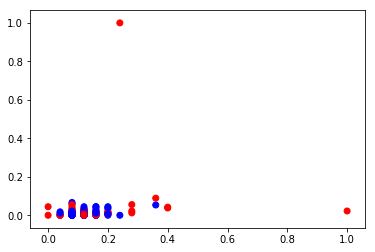

In [5]:
import mysk

vX = X_train.values
colors = np.array(['b', 'r'])[intY]
plt.scatter(vX[:, 0], vX[:, 1], color = colors)
# mysk.draw_sep_curve(gnb_model)
# plt.scatter(gnb_model.theta_[:, 0], gnb_model.theta_[:, 40], color = ['b', 'r'], s = 100)

#### Средние значения признаков в получившейся модели для заданных классов

In [6]:
gnb_model.theta_

array([[ 0.12333333,  0.01308642,  0.        ,  0.        ,  0.77777778,
         0.19444444,  0.01388889,  0.        ,  0.01388889,  0.09722222,
         0.48611111,  0.41666667,  0.69444444,  0.04166667,  0.20833333,
         0.05555556,  0.16666667,  0.19444444,  0.38888889,  0.25      ,
         0.81944444,  0.        ,  0.18055556,  0.20833333,  0.18055556,
         0.        ,  0.41666667,  0.04166667,  0.01388889,  0.02777778,
         0.05555556,  0.        ,  0.        ,  0.04166667,  0.01388889,
         0.77777778,  0.01388889,  0.01388889,  0.09722222,  0.01388889,
         0.65277778],
       [ 0.1624    ,  0.03806844,  0.02      ,  0.02      ,  0.56      ,
         0.3       ,  0.08      ,  0.02      ,  0.        ,  0.06      ,
         0.32      ,  0.62      ,  0.76      ,  0.        ,  0.2       ,
         0.04      ,  0.14      ,  0.3       ,  0.36      ,  0.2       ,
         0.82      ,  0.        ,  0.18      ,  0.2       ,  0.08      ,
         0.02      ,  0.5    

#### Ошибки

In [7]:
err_train = np.mean(Y_train != gnb_model.predict(X_train))
err_test = np.mean(Y_test != gnb_model.predict(X_test))
print(err_train, err_test)

0.524590163934 0.433962264151


In [8]:
gnb_model.sigma_

array([[  2.78888914e-03,   2.54671794e-04,   2.50000000e-10,
          2.50000000e-10,   1.72839506e-01,   1.56635803e-01,
          1.36959879e-02,   2.50000000e-10,   1.36959879e-02,
          8.77700620e-02,   2.49807099e-01,   2.43055556e-01,
          2.12191358e-01,   3.99305558e-02,   1.64930556e-01,
          5.24691361e-02,   1.38888889e-01,   1.56635803e-01,
          2.37654321e-01,   1.87500000e-01,   1.47955247e-01,
          2.50000000e-10,   1.47955247e-01,   1.64930556e-01,
          1.47955247e-01,   2.50000000e-10,   2.43055556e-01,
          3.99305558e-02,   1.36959879e-02,   2.70061731e-02,
          5.24691361e-02,   2.50000000e-10,   2.50000000e-10,
          3.99305558e-02,   1.36959879e-02,   1.72839506e-01,
          1.36959879e-02,   1.36959879e-02,   8.77700620e-02,
          1.36959879e-02,   2.26658951e-01],
       [  2.19142403e-02,   1.92086952e-02,   1.96000002e-02,
          1.96000002e-02,   2.46400000e-01,   2.10000000e-01,
          7.36000003e-02,

In [9]:
print("Class counts: ", gnb_model.class_count_)
print("Priors: ", gnb_model.class_prior_)

Class counts:  [ 72.  50.]
Priors:  [ 0.59016393  0.40983607]


### Confusion matrix, специфичность, чувствительность

Confusion matrix имеет вид (для двух классов):
$
\begin{array}{|c|c|}
\hline
{\rm TN} & {\rm FN} \\
\hline
{\rm FP} & {\rm TP} \\
\hline
\end{array}
$

${\rm TN}$ – true negative
${\rm FP}$ – false positive
${\rm FN}$ – false negative
${\rm TP}$ – true positive


${\rm FP}$ – _ложные тревоги_ (ошибки 1-го рода или $\alpha$-ошибки)

${\rm FN}$ – _промахи_ (ошибки 2-го рода или $\beta$-ошибки)

$\alpha = {\rm FPR} = \frac{{\rm FP}}{{\rm TN}+{\rm FP}}$ – вероятность ошибки первого рода (_уровень значимости_)

$\beta = {\rm FNR} = \frac{{\rm FN}}{{\rm FN}+{\rm TP}}$ – вероятность ошибки второго рода

${\rm TNR} = \frac{{\rm TN}}{{\rm TN}+{\rm FP}} = 1 - {\rm FPR}$ – _специфичность_

${\rm TPR} = {\rm recall} = \frac{{\rm TP}}{{\rm FN}+{\rm TP}} = 1 - {\rm FNR}$ – _чувствительность_


Еще:

${\rm error} = \frac{{\rm FP} + {\rm FN}}{{\rm TP} + {\rm TN} + {\rm FP} + {\rm FN}}$ 

${\rm accuracy} = \frac{{\rm TP} + {\rm TN}}{{\rm TP} + {\rm TN} + {\rm FP} + {\rm FN}} = 1 - {\rm error}$ 

${\rm precision} = \frac{{\rm TP}}{{\rm FP}+{\rm TP}}$ 

$F_1 = 2\cdot\frac{{\rm precision}\cdot{\rm recall}}{{\rm precision}+{\rm recall}}$ 


#### Использование различных классификаторов

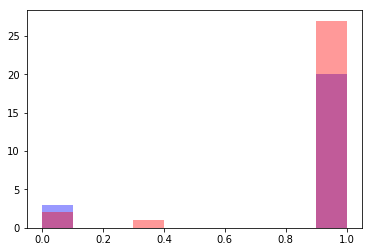

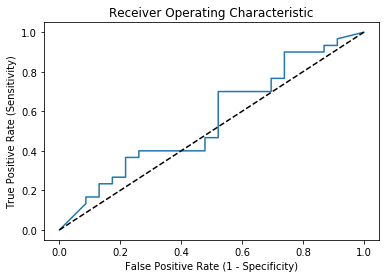

In [11]:
from ipywidgets import interact


defines = {
    'gaussian': {
        'ctor': GaussianNB,
        'priors': True
    },
    'bernoulli': {
        'ctor': BernoulliNB,
        'priors': False
    },
    'multinomial': {
        'ctor': MultinomialNB,
        'priors': False
    }
}

_, n_features = X.shape
intY_test = pd.Series([0 if val is 'C1' else 1 for val in Y_test])
def print_svc_data(model='gaussian', graph='hist'):
    model_defines = defines[model]
    nb_model = model_defines['ctor']()
    nb_model.fit(X_train, Y_train)
    Y_train_predict = nb_model.predict(X_train)
    Y_test_predict = nb_model.predict(X_test)
    err_train = np.mean(Y_train != Y_train_predict)
    err_test = np.mean(Y_test != Y_test_predict)
    print(f"Errors: train - {err_train} | test - {err_test}")
    print("Class counts: ", nb_model.class_count_)
    if model_defines['priors']:
        print("Priors: ", nb_model.class_prior_)
        pass
    from sklearn.metrics import confusion_matrix
    cm_train = confusion_matrix(Y_train_predict, Y_train)
    print("Train data Confusion Matrix:\n", cm_train)
    cm_test = confusion_matrix(Y_test_predict, Y_test)
    print("Test data Confusion Matrix:\n", cm_test)
    
    tnr_tr = 1 - float(cm_train[1, 0])/(cm_train[0, 0] + cm_train[1, 0])
    tpr_tr = 1 - float(cm_train[0, 1])/(cm_train[0, 1] + cm_train[1, 1])
    print(f"Train data: Specificity={tnr_tr} | Sensitivity={tpr_tr}")
    tnr_tst = 1 - float(cm_test[1, 0])/(cm_test[0, 0] + cm_test[1, 0])
    tpr_tst = 1 - float(cm_test[0, 1])/(cm_test[0, 1] + cm_test[1, 1])
    print(f"Test data: Specificity={tnr_tst} | Sensitivity={tpr_tst}")
    probability = nb_model.predict_proba(X_test)[:, 1]
    from sklearn.metrics import roc_curve
    fpr, tpr, thresholds = roc_curve(intY_test, probability)
    print("                   Test data:\n")
    if graph is 'hist':
        plt.hist(probability[Y_test == 'C1'], color = 'b', alpha = 0.4, normed = False)
        plt.hist(probability[Y_test == 'C2'], color = 'r', alpha = 0.4, normed = False)
        pass
    else:
        from sklearn.metrics import roc_curve
        fpr, tpr, thresholds = roc_curve(intY_test, probability)
        plt.title('Receiver Operating Characteristic')
        plt.plot(np.concatenate(([0], fpr)), np.concatenate(([0], tpr)))
        #plt.plot(fpr, tpr)
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.axis([-0.05, 1.05, -0.05, 1.05])
        pass
    from sklearn.metrics import auc
    print("Area Under Curve: ", auc(fpr, tpr))
    pass

interact(print_svc_data, model=defines.keys(), graph=['hist', 'roc'])
pass

# Деревья решений

Dataset: [armenian pubs](https://www.kaggle.com/erikhambardzumyan/pubs)

Подробнее о данных можно узнать в [первой работе](https://github.com/andrgolubev/python-sandbox/blob/master/data_analysis_1.ipynb)

## Популярные алгоритмы построения дерева
 
  * See5/C5.0 [Quinlan et., 1997]  ← C4.5 [Quinlan, 1993]  ← ID3 [Quinlan, 1979]  ← CLS [Hunt & Marin & Stone & 1966] 
  * Classification and Regression Trees [Breiman & Friedman & Olshen & Stone, 1984]  ← CHAID [Kass, 1980]  ← THAID [Morgan & Messenger 1973]  ← AID [Morgan & Sonquist, 1963]

– это жадные рекурсивные алгоритмы, на каждом шаге разбивающие очередной ящик, чтобы добиться максимального уменьшения 
взвешенной _неоднородности_

## Плюсы и минусы деревьев решений

**Некоторые плюсы**

* Возможность интерпретации построенного решающего правила
* Не нуждается в большой подготовке данных
* Возможно протестировать модель с помощью статистических тестов
* Возможность определения значимости признаков
* Нечувствительность к монотонным преобразованиям входных переменных
* Поддерживают работу с входными переменными разных (смешанных) типов
* Достаточно устойчивы к выбросам


**Некоторые минусы**

* Можно легко создать слишком сложные деревья, которые слишком хорошо описывают выборку и плохо генерализуют проблему (переобучение)
* NP-complete проблема поиска оптимального дерева. На практике используют "жадные" алгоритмы
* Некоторые данные невозможно правильно интерпретировать с помощью деревьев решений (_например_ XOR)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Ирисы Фишера

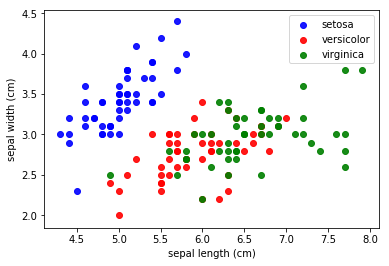

In [3]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target
y_names = iris.target_names
feature_names = iris.feature_names

j1 = 0
j2 = 1

plt.scatter(X[y == 0, j1], X[y == 0, j2], color = 'b', label = y_names[0], alpha = 0.9)
plt.scatter(X[y == 1, j1], X[y == 1, j2], color = 'r', label = y_names[1], alpha = 0.9)
plt.scatter(X[y == 2, j1], X[y == 2, j2], color = 'g', label = y_names[2], alpha = 0.9)
plt.xlabel(feature_names[j1])
plt.ylabel(feature_names[j2])

plt.legend(loc = 'best')

In [4]:
X = X[:, [j1, j2]]

from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [7]:
tree.export_graphviz(tree_model, out_file = 'iris_tree.dot', feature_names = [feature_names[j1], feature_names[j2]])   
!dot -Tpng iris_tree.dot -o iris_tree.png

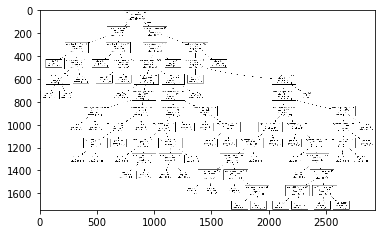

In [9]:
from scipy import misc
i = misc.imread('iris_tree.png')
plt.imshow(i)

### Наши данные

In [10]:
import data_retrieve as dr
X, data = dr.parse_and_prepare("armenian_pubs.csv", sep=",", engine="python")
Y = None
Y_numeric = data['wts']
Y_mean = np.mean(Y_numeric)
Y = pd.Series(['C1' if val <= Y_mean else 'C2' for val in Y_numeric])
intY = pd.Series([0 if val is 'C1' else 1 for val in Y])
feature_names = X.columns
print(feature_names)

Index(['age', 'income', 'occupation_CEO',
       'occupation_Entrepreneur_/_Software_Engineer', 'occupation_Student',
       'occupation_Student_+_working', 'occupation_Working',
       'occupation_Working', 'occupation_army', 'freq_Several_times_a_week',
       'freq_Several_times_in_a_month', 'freq_rarely', 'prim_imp_Environment',
       'prim_imp_Menu', 'prim_imp_Music', 'prim_imp_Pricing',
       'sec_imp_Environment', 'sec_imp_Menu', 'sec_imp_Music',
       'sec_imp_Pricing', 'stratum_Capital', 'stratum_Rural', 'stratum_Urban',
       'lifestyle_Adventure/traveling/exploring', 'lifestyle_Art',
       'lifestyle_Business_sports_dance', 'lifestyle_Busy',
       'lifestyle_Nightlife', 'lifestyle_Passive', 'lifestyle_Rock_punk',
       'lifestyle_Sport', 'lifestyle_Sport_art_traveling', 'lifestyle_Student',
       'occasions_Birthdays', 'occasions_For_listening__good_music',
       'occasions_Hang_outs_with_friends', 'occasions_Never',
       'occasions_Nowere', 'occasions_Special_eve

#### Разбиение на обучающую и тестовую выборки

In [48]:
from sklearn.model_selection import train_test_split
# constant random_state to have repeatability
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5, random_state=7)
N_train, _ = X_train.shape
N_test, _ = X_test.shape
intY = pd.Series([0 if val is 'C1' else 1 for val in Y_train])
intY_test = pd.Series([0 if val is 'C1' else 1 for val in Y_test])
print(N_train, N_test)

87 88


#### Инициализация

In [58]:
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

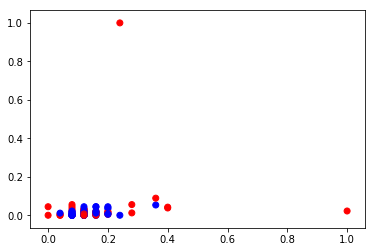

In [59]:
vX = X_train.values
colors = np.array(['b', 'r'])[intY]
plt.scatter(vX[:, 0], vX[:, 1], color = colors)

#### Ошибки

In [60]:
Y_train_pred = tree_model.predict(X_train)
Y_test_pred = tree_model.predict(X_test)

print(np.mean(Y_train_pred != Y_train))
print(np.mean(Y_test_pred != Y_test))

0.0
0.488636363636


#### Визуализация

In [61]:
tree.export_graphviz(tree_model, out_file = 'armenian_pubs_tree.dot', feature_names=X.columns)   
!dot -Tpng armenian_pubs_tree.dot -o armenian_pubs_tree.png

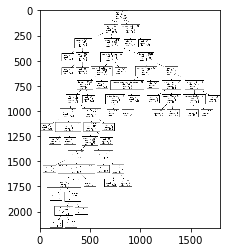

In [62]:
i = misc.imread('armenian_pubs_tree.png')
plt.imshow(i)

## Подбор параметров

In [63]:
from sklearn.model_selection import GridSearchCV
depth_array = np.arange(1, 25)
tree_model = tree.DecisionTreeClassifier()
grid = GridSearchCV(tree_model, param_grid = {'max_depth': depth_array}, cv = 5)
grid.fit(X_train, Y_train)
min_err_cv = 1 - grid.best_score_
argmin_err_cv = grid.best_estimator_.max_depth
print(min_err_cv)
print(argmin_err_cv)

0.390804597701
20


In [64]:
err_cv  = 1-np.array([x[1] for x in grid.grid_scores_])
err_std = map(np.std, [x[2] for x in grid.grid_scores_])
# plt.errorbar(np.arange(1, 25), err_cv, yerr = err_std)
# plt.axhline(y = min_err_cv + err_std[argmin_err_cv - 1], color = 'gray')

/home/abay/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/home/abay/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [65]:
from sklearn.metrics import confusion_matrix
CF = confusion_matrix(Y_test_pred, Y_test)
print(CF)

[[27 24]
 [19 18]]


### ROC-кривая

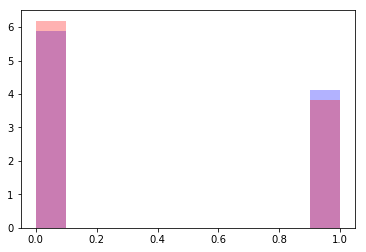

In [66]:
from sklearn.metrics import roc_curve
tree_model.fit(X_train, Y_train)
proba = tree_model.predict_proba(X_test)[:, 1]

plt.hist(proba[intY_test == 0], color = 'b', alpha = 0.3, normed = True)
plt.hist(proba[intY_test == 1], color = 'r', alpha = 0.3, normed = True)
pass

[-0.05, 1.05, -0.05, 1.05]

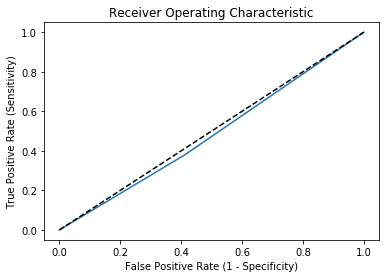

In [67]:
fpr, tpr, thresholds = roc_curve(intY_test, proba)
plt.title('Receiver Operating Characteristic')
plt.plot(np.concatenate(([0], fpr)), np.concatenate(([0], tpr)))
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.05, 1.05, -0.05, 1.05])

#### Area Under Curve

In [68]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.48395445134575565

### Значимость признаков

In [69]:
importances = tree_model.feature_importances_
indices = np.argsort(importances)[:-11:-1]
names = X.columns
print("Feature ranking:")

for f in range(10):
    print("%2d. feature '%5s' (%f)" % (f + 1, names[indices[f]], importances[indices[f]]))

Feature ranking:
 1. feature 'income' (0.254902)
 2. feature '  age' (0.214498)
 3. feature 'sec_imp_Music' (0.133497)
 4. feature 'lifestyle_Rock_punk' (0.051076)
 5. feature 'lifestyle_Busy' (0.045166)
 6. feature 'lifestyle_Sport' (0.041605)
 7. feature 'occupation_Student' (0.040049)
 8. feature 'freq_rarely' (0.037739)
 9. feature 'occasions_Hang_outs_with_friends' (0.037379)
10. feature 'prim_imp_Pricing' (0.030037)


(-1, 10)

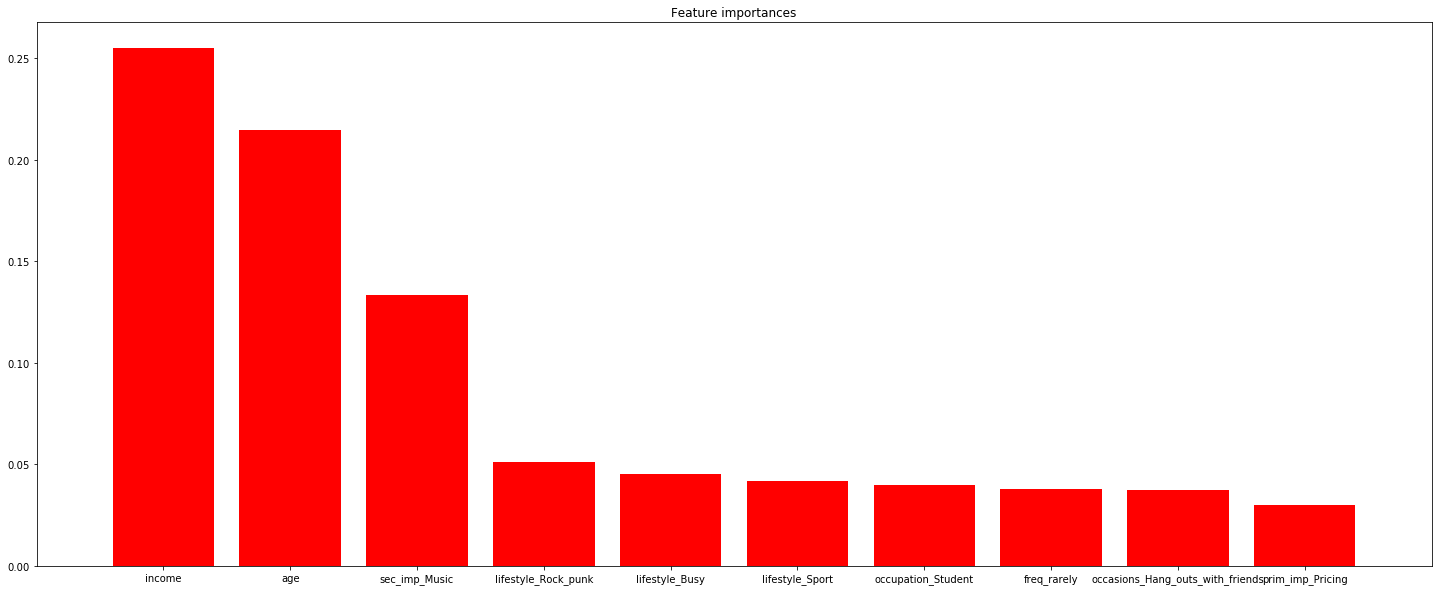

In [86]:
plt.figure(figsize=(25,10))
plt.title("Feature importances")
plt.bar(range(10), importances[indices], align = 'center', color = 'r')
plt.xticks(range(10), np.array(names)[indices])
plt.xlim([-1, 10])

# Ансамбли решающих функций (классификаторов)

На сегодняшний день существуют два подхода:
    
* Баггинг (построение независимых классификаторов):
        - Bagging
        - Random Forests
        - ...
* Бустинг (новые классификаторы знают об ошибках других и учатся на их ошибках):
        - AdaBoost
        - Gradient Boosting
        - ...


Dataset: [armenian pubs](https://www.kaggle.com/erikhambardzumyan/pubs)

Подробнее о данных можно узнать в [первой работе](https://github.com/andrgolubev/python-sandbox/blob/master/data_analysis_1.ipynb)

## Плюсы и минусы ансамблей деревьев решений

** Плюсы **:

* Все достоинства деревьев решений сохраняются (кроме возможности интерпретации решающего правила - но остается возможность определения значимости признаков)
* Хорошее (часто рекордное) качество предсказания
* Random Forest (почти) не переобучается (GBT, AdaBoost - чуть похуже)

** Минусы **:

* GBT, AdaBoost - много параметров, которые надо подбирать
* Медленно обучаются (особенно GBT, который требует обычно много деревьев)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
import data_retrieve as dr
X, data = dr.parse_and_prepare("armenian_pubs.csv", sep=",", engine="python")
Y = None
Y_numeric = data['wts']
Y_mean = np.mean(Y_numeric)
Y = pd.Series(['C1' if val <= Y_mean else 'C2' for val in Y_numeric])
intY = pd.Series([0 if val is 'C1' else 1 for val in Y])
feature_names = X.columns

from sklearn.model_selection import train_test_split
# constant random_state to have repeatability
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=7)
N_train, _ = X_train.shape
N_test, _ = X_test.shape
intY = pd.Series([0 if val is 'C1' else 1 for val in Y_train])
intY_test = pd.Series([0 if val is 'C1' else 1 for val in Y_test])
print(N_train, N_test)

122 53


/home/andrgolubev/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Random Forest

Ансамбль параллельно обучаемых «независимых» деревьев решений.

Независимое построение определенного количества $M = {}$`n_estimators` (по умолчанию, 10) деревьев:

Генерация случайной bootstrap-подвыборки (по умолчанию, ее мощность равна $\sqrt{N}$) из обучающей выборки и построение дерева решений по данной подвыборке (в каждом
новом узле дерева переменная для разбиения выбирается не из всех признаков, а из
случайно выбранного их подмножества небольшой мощности).

In [3]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=700)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [4]:
err_train = np.mean(Y_train != rf_model.predict(X_train))
err_test = np.mean(Y_test != rf_model.predict(X_test))
print(err_train, err_test)

0.0 0.528301886792


In [5]:
n_estimators = []
for i in range(1, 700, 10):
    n_estimators.append(i)
    pass

Оптимальное число эстиматоров:

In [6]:
from sklearn.model_selection import GridSearchCV
rf_default = RandomForestClassifier()
# using cross-validation
rf_grid_cv = GridSearchCV(rf_default, param_grid = {'n_estimators': n_estimators}, cv=None, n_jobs=4)
rf_grid_cv.fit(X_train, Y_train)
best_cv_err = 1 - rf_grid_cv.best_score_
best_n_estimators = rf_grid_cv.best_estimator_.n_estimators
print(best_cv_err, best_n_estimators)

0.426229508197 161


## AdaBoost

Будем использовать веса $w_1,w_2, \dots ,w_N$.

На первой итерации $w_i = 1/N$ ($i = 1, 2, \dots ,N$) и алгоритм построения $f_1$ работает в
обычном режиме.
На $m$-й итерации увеличиваются веса тех прецедентов, на которых на $(m − 1)$-й
итерации была допущена ошибка, и уменьшаются веса тех прецедентов, которые на
предыдущей итерации были классифицированы правильно.

На $m$-й итерации ищем классификатор $f_m$, минимизирующий ошибку
$$
{\rm err}_m = \sum_{f_m(x^{(i)}) \ne y^{(i)}} w_i
$$


In [7]:
from sklearn.ensemble import AdaBoostClassifier
adab_model = AdaBoostClassifier(n_estimators=700)
adab_model.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=700, random_state=None)

In [8]:
err_train = np.mean(Y_train != adab_model.predict(X_train))
err_test = np.mean(Y_test != adab_model.predict(X_test))
print(err_train, err_test)

0.139344262295 0.509433962264


Оптимальное число эстиматоров:

In [9]:
from sklearn.model_selection import GridSearchCV
adab_default = AdaBoostClassifier()
# using cross-validation
adab_grid_cv = GridSearchCV(adab_default, param_grid = {'n_estimators': n_estimators}, cv=None, n_jobs=4)
adab_grid_cv.fit(X_train, Y_train)
best_cv_err = 1 - adab_grid_cv.best_score_
best_n_estimators = adab_grid_cv.best_estimator_.n_estimators
print(best_cv_err, best_n_estimators)

0.434426229508 1


## Gradient Boosting

На каждой итерации строится новый классификатор, аппроксимирующий значение градиента функции потерь

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
gdb_model = GradientBoostingClassifier(n_estimators=700)
gdb_model.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=700,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [11]:
err_train = np.mean(Y_train != gdb_model.predict(X_train))
err_test = np.mean(Y_test != gdb_model.predict(X_test))
print(err_train, err_test)

0.0 0.547169811321


Оптимальное число эстиматоров:

In [12]:
from sklearn.model_selection import GridSearchCV
gdb_default = GradientBoostingClassifier()
# using cross-validation
gdb_grid_cv = GridSearchCV(gdb_default, param_grid = {'n_estimators': n_estimators}, cv=None, n_jobs=4)
gdb_grid_cv.fit(X_train, Y_train)
best_cv_err = 1 - gdb_grid_cv.best_score_
best_n_estimators = gdb_grid_cv.best_estimator_.n_estimators
print(best_cv_err, best_n_estimators)

0.409836065574 1


### Общие параметры для каждого дерева

In [13]:
from ipywidgets import interact

defines = {
    'random_forest': {
        'ctor': RandomForestClassifier
    },
    'ada_boost': {
        'ctor': AdaBoostClassifier
    },
    'gradient_boosting': {
        'ctor': GradientBoostingClassifier
    }
}

names = X.columns
_, n_features = X.shape
def print_svc_data(model='random_forest', graph='roc', n_estimators=700):
    model_defines = defines[model]
    tree_model = model_defines['ctor'](n_estimators=n_estimators)
    tree_model.fit(X_train, Y_train)
    Y_train_predict = tree_model.predict(X_train)
    Y_test_predict = tree_model.predict(X_test)
    err_train = np.mean(Y_train != Y_train_predict)
    err_test = np.mean(Y_test != Y_test_predict)
    print(f"Errors: train - {err_train} | test - {err_test}")
    from sklearn.metrics import confusion_matrix
    cm_train = confusion_matrix(Y_train_predict, Y_train)
    print("Train data Confusion Matrix:\n", cm_train)
    cm_test = confusion_matrix(Y_test_predict, Y_test)
    print("Test data Confusion Matrix:\n", cm_test)
    
    tnr_tr = 1 - float(cm_train[1, 0])/(cm_train[0, 0] + cm_train[1, 0])
    tpr_tr = 1 - float(cm_train[0, 1])/(cm_train[0, 1] + cm_train[1, 1])
    print(f"Train data: Specificity={tnr_tr} | Sensitivity={tpr_tr}")
    tnr_tst = 1 - float(cm_test[1, 0])/(cm_test[0, 0] + cm_test[1, 0])
    tpr_tst = 1 - float(cm_test[0, 1])/(cm_test[0, 1] + cm_test[1, 1])
    print(f"Test data: Specificity={tnr_tst} | Sensitivity={tpr_tst}")
    probability = tree_model.predict_proba(X_test)[:, 1]
    from sklearn.metrics import roc_curve
    fpr, tpr, thresholds = roc_curve(intY_test, probability)
    
    importances = tree_model.feature_importances_
    indices = np.argsort(importances)[:-11:-1]
    print("Feature ranking:")
    for f in range(10):
        print("%2d. feature '%5s' (%f)" % (f + 1, names[indices[f]], importances[indices[f]]))
        
    plt.hist(probability[Y_test == 'C1'], color = 'b', alpha = 0.4, normed = False)
    plt.hist(probability[Y_test == 'C2'], color = 'r', alpha = 0.4, normed = False)
    
    from sklearn.metrics import roc_curve
    fpr, tpr, thresholds = roc_curve(intY_test, probability)
    plt.title('Receiver Operating Characteristic')
    plt.plot(np.concatenate(([0], fpr)), np.concatenate(([0], tpr)))
    #plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.05, 1.05, -0.05, 1.05])
    from sklearn.metrics import auc
    print("Area Under Curve: ", auc(fpr, tpr))
    pass

# interact(print_svc_data, model=defines.keys(), graph=['hist', 'roc'], n_estimators=(1, 2500, 1))
pass

RandomForest

Errors: train - 0.0 | test - 0.5660377358490566
Train data Confusion Matrix:
 [[72  0]
 [ 0 50]]
Test data Confusion Matrix:
 [[16 23]
 [ 7  7]]
Train data: Specificity=1.0 | Sensitivity=1.0
Test data: Specificity=0.6956521739130435 | Sensitivity=0.23333333333333328
Feature ranking:
 1. feature 'income' (0.172544)
 2. feature '  age' (0.132673)
 3. feature 'gender' (0.053683)
 4. feature 'occupation_Student' (0.051004)
 5. feature 'sec_imp_Music' (0.042266)
 6. feature 'freq_rarely' (0.040926)
 7. feature 'sec_imp_Pricing' (0.038409)
 8. feature 'freq_Several_times_in_a_month' (0.034144)
 9. feature 'sec_imp_Menu' (0.033086)
10. feature 'lifestyle_Busy' (0.032829)
Area Under Curve:  0.484057971014


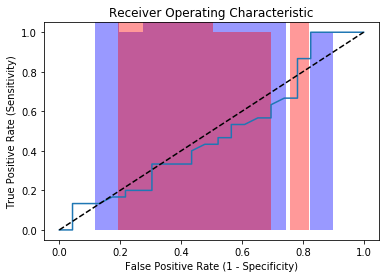

In [14]:
print_svc_data(model='random_forest', n_estimators=rf_grid_cv.best_estimator_.n_estimators)

AdaBoost

Errors: train - 0.36065573770491804 | test - 0.5471698113207547
Train data Confusion Matrix:
 [[71 43]
 [ 1  7]]
Test data Confusion Matrix:
 [[22 28]
 [ 1  2]]
Train data: Specificity=0.9861111111111112 | Sensitivity=0.14
Test data: Specificity=0.9565217391304348 | Sensitivity=0.06666666666666665
Feature ranking:
 1. feature '  age' (1.000000)
 2. feature 'sec_imp_Pricing' (0.000000)
 3. feature 'sec_imp_Menu' (0.000000)
 4. feature 'sec_imp_Environment' (0.000000)
 5. feature 'prim_imp_Pricing' (0.000000)
 6. feature 'prim_imp_Music' (0.000000)
 7. feature 'prim_imp_Menu' (0.000000)
 8. feature 'prim_imp_Environment' (0.000000)
 9. feature 'freq_rarely' (0.000000)
10. feature 'freq_Several_times_in_a_month' (0.000000)
Area Under Curve:  0.511594202899


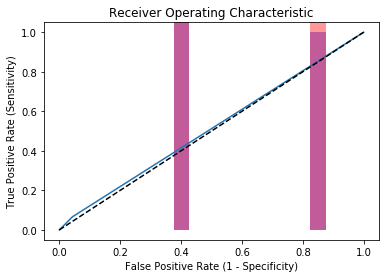

In [15]:
print_svc_data(model='ada_boost', n_estimators=adab_grid_cv.best_estimator_.n_estimators)

Gradient Boosting

Errors: train - 0.4098360655737705 | test - 0.5660377358490566
Train data Confusion Matrix:
 [[72 50]
 [ 0  0]]
Test data Confusion Matrix:
 [[23 30]
 [ 0  0]]
Train data: Specificity=1.0 | Sensitivity=0.0
Test data: Specificity=1.0 | Sensitivity=0.0
Feature ranking:
 1. feature '  age' (0.320982)
 2. feature 'freq_rarely' (0.227989)
 3. feature 'gender' (0.188439)
 4. feature 'sec_imp_Music' (0.151611)
 5. feature 'sec_imp_Pricing' (0.110979)
 6. feature 'income' (0.000000)
 7. feature 'freq_Several_times_in_a_month' (0.000000)
 8. feature 'sec_imp_Environment' (0.000000)
 9. feature 'prim_imp_Pricing' (0.000000)
10. feature 'prim_imp_Music' (0.000000)
Area Under Curve:  0.495652173913


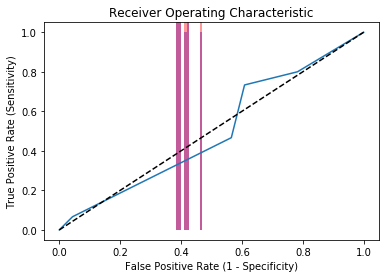

In [16]:
print_svc_data(model='gradient_boosting', n_estimators=gdb_grid_cv.best_estimator_.n_estimators)

# PCA

#### Сначала рассмотрим все компоненты исходной выборки и variance ratio, объясняемый каждой компонентой

In [17]:
from sklearn.decomposition import PCA
test_pca = PCA(n_components=41)
test_pca.fit(X)
print("Variance ratio:", list(map(lambda x: x * 100, test_pca.explained_variance_ratio_)))

Variance ratio: [13.750251926301463, 12.519204425529917, 10.903914690661825, 9.6843632284116747, 7.7391364963116507, 6.586544699922749, 6.2976602381936599, 5.4940469209237301, 4.5040899393102585, 4.0736519915250717, 3.2745385492491756, 2.3274341798427765, 1.9912927426164639, 1.8244584485123641, 1.7380701446250237, 1.4750579733295259, 0.9813248784693539, 0.90863557150003249, 0.82816710352869272, 0.5222752158386379, 0.42652135971759347, 0.39480831518946397, 0.30679214756040435, 0.21615558011842356, 0.20288764502201917, 0.19078998856428925, 0.15074993263867775, 0.13822941603165434, 0.13446490383409765, 0.12629344825484323, 0.11931481135714053, 0.086718661782530598, 0.059325957094657857, 0.016294966910864295, 0.006533501319281927, 2.7117590453997833e-30, 3.9848116094346523e-31, 2.223441382602472e-31, 1.2878440603021875e-31, 9.2418808796832532e-32, 5.1485548338127467e-32]


#### Возьмем только те компоненты, которые имеют порядок 10 и объясняют ~60% общей дисперсии

Получим 7 главных компонент

In [18]:
import math
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
pca.fit(X)
print("Variance ratio:", list(map(lambda x: str(int(x * 100 + 0.5)) + "%", pca.explained_variance_ratio_)))
print("Variance:", pca.explained_variance_)
# print("Principal axes:", pca.components_)
print("Singular values:", pca.singular_values_)

Variance ratio: ['14%', '13%', '11%', '10%', '8%', '7%', '6%']
Variance: [ 0.5338941   0.48609505  0.42337666  0.37602397  0.30049481  0.25574203
  0.24452524]
Singular values: [ 9.63833871  9.19676781  8.58297957  8.08876823  7.23091256  6.67076557
  6.52283616]


"Сожмем" исходные данные, оставив только главныe компоненты

In [19]:
X_with_pca = pd.DataFrame(pca.transform(X))

In [20]:
X.shape

(175, 41)

In [21]:
print(X_with_pca.shape)
X_with_pca.head()

(175, 7)


,0,1,2,3,4,5,6
0,0.134563,-1.104269,-0.612171,0.159850,0.260709,0.429692,0.034214
1,0.840335,0.722744,0.148524,-0.673097,0.032362,0.888287,0.306567
2,-0.916632,0.118781,-0.028603,0.218110,-0.598056,-0.236084,0.538700
3,-0.362633,-1.052839,-0.554140,-0.584881,-0.074192,-0.337969,0.308242
4,0.471825,0.463484,1.288841,-0.055789,0.293284,-0.168592,0.271670


Разделим сжатые данные таким же образом, как исходные (такие же размеры обучающей и тестовой выборок, то же случайное состояние (seed))

In [22]:
X_train_pca, X_test_pca, _, _ = train_test_split(X_with_pca, Y, train_size=0.7, random_state=7)
N_train_pca, _ = X_train_pca.shape
N_test_pca, _ = X_test_pca.shape
print(N_train_pca, N_test_pca)

122 53


/home/andrgolubev/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Применим классификатор для новых данных и посмотрим на ошибку

In [23]:
classifier = AdaBoostClassifier(n_estimators=100)
classifier.fit(X_train_pca, Y_train)

err_train = np.mean(Y_train != adab_model.predict(X_train))
err_test = np.mean(Y_test != adab_model.predict(X_test))
print("Old data:", err_train, err_test)

err_train = np.mean(Y_train != classifier.predict(X_train_pca))
err_test = np.mean(Y_test != classifier.predict(X_test_pca))
print("New data:", err_train, err_test)

Old data: 0.139344262295 0.509433962264
New data: 0.0 0.433962264151


Можно заметить, что ошибка уменьшилась для обеих выборок (traing, test)

#### Найдем оптимальное количество главных компонент

In [24]:
from sklearn.pipeline import Pipeline
pipeline_estimators = [('reduce_dim', PCA()), ('clf', AdaBoostClassifier())]
ppl = Pipeline(pipeline_estimators)
ppl

Pipeline(memory=None,
     steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))])

In [25]:
print(ppl.steps)

[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))]


In [26]:
n_estimators_pca = []
for i in range(1, 501, 10):
    n_estimators_pca.append(i)
    pass

n_components_pca = []
for i in range(1, 15, 1):
    n_components_pca.append(i)
    pass

param_grid = dict(reduce_dim__n_components=n_components_pca, clf__n_estimators=n_estimators_pca)
pca_grid_cv = GridSearchCV(ppl, param_grid, n_jobs=2)
pca_grid_cv.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None))]),
       fit_params=None, iid=True, n_jobs=2,
       param_grid={'reduce_dim__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'clf__n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251, 261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381, 391, 401, 411, 421, 431, 441, 451, 461, 471, 481, 491]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [27]:
pca_grid_cv.best_estimator_

Pipeline(memory=None,
     steps=[('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=1, random_state=None))])

In [28]:
_, clf = pca_grid_cv.best_estimator_.steps[1]

In [29]:
_, pca_dim_red = pca_grid_cv.best_estimator_.steps[0]

In [30]:
print("Optimal number of estimators:", clf.n_estimators)

Optimal number of estimators: 1


In [31]:
print("Optimal number of principal components:", pca_dim_red.n_components)

Optimal number of principal components: 5


In [32]:
opt_pca = PCA(n_components=pca_dim_red.n_components)
opt_reduced_X = opt_pca.fit_transform(X)
opt_X_train, opt_X_test, _, _ = train_test_split(opt_reduced_X, Y, train_size=0.7, random_state=7)

adab_def = AdaBoostClassifier()
gdb_grid_cv = GridSearchCV(adab_def, param_grid = {'n_estimators': n_estimators}, cv=None, n_jobs=4)
gdb_grid_cv.fit(opt_X_train, Y_train)
opt_best_n_estimators = gdb_grid_cv.best_estimator_.n_estimators
print("Best number of estimators:", opt_best_n_estimators)
opt_clf = AdaBoostClassifier(n_estimators=opt_best_n_estimators)
opt_clf.fit(opt_X_train, Y_train)
err_train = np.mean(Y_train != opt_clf.predict(opt_X_train))
err_test = np.mean(Y_test != opt_clf.predict(opt_X_test))
print("Optimal result:", err_train, err_test)

/home/andrgolubev/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Best number of estimators: 141
Optimal result: 0.0 0.471698113208


# Выводы по проделанной работе

В ходе курса был произведен анализ данных опроса людей о Армянских пабах. Ссылка: [armenian pubs](https://www.kaggle.com/erikhambardzumyan/pubs)

**Задача**: определить по выборке зависимость между количеством денег, потраченном в баре, и входными параметрами

**Применение**: классифицировать потенциальное количество денег (качественное), которое потратит клиент, по его характеристике

**Проблемы в ходе выполнения работы**:

* Мало данных, чтобы построить качественный обобщенный классификатор
* Некоторые признаки взаимосвязаны
* Подавляющее большинство данных сгруппировано около мат. ожидания (получается некий аналог нормального распределения с малой дисперсией), что может плохо сказаться на ошибке и на классификации для данных, далеко расположенных от "центра масс"
* Слабая корреляция между входными (признаки) и выходным (класс) параметрами
* Экземпляры из выборки сильно пересекаются между собой

### Получившиеся результаты

* Наилучшим классификатором оказались деревья решений
* Уменьшение размерности привело к уменьшению ошибки => в данной задаче лучше сократить число признаков, а потом уже проводить классификацию (оптимальное число признаков - 5)

### Общие выводы

- В различных задачах различные классификаторы будут оптимальными
- Необходима предобработка данных в том или ином виде (нормализация, удаление нерелевантных признаков, заполнение пропусков и т.д.)
- Для большинства задач полезно использовать методы сокращения размерности для устранения "шумовых", слабозначимых признаков
- Для достижения наилучшего результата необходим tuning (подбор гиперпараметров алгоритма)
- Нельзя забывать о переобучении и недообучении
- Очень часто визуализация данных помогает в понимании сути задачи и в поиске оптимального решения